In [1]:
import pandas as pd

# Bring in CSV converted from PDF

# PDF: The World’s Religions in Figures: An Introduction to International Religious Demography, 
First Edition. Todd M. Johnson and Brian J. Grim 
© 2013 John Wiley & Sons, Ltd. Published 2013 by John Wiley & Sons, Ltd.

# Data source: Todd M. Johnson and Brian J. Grim, eds., World Religion Database (Leiden/Boston: Brill, accessed January 2012)

In [5]:
population = pd.read_csv('../data/johnson_grim/1910_2010_csv/population.csv', thousands=',')

In [6]:
agnostic = pd.read_csv('../data/johnson_grim/1910_2010_csv/agnostics.csv', thousands=',')

In [7]:
atheist = pd.read_csv('../data/johnson_grim/1910_2010_csv/atheist.csv', thousands=',')


In [8]:
buddhist = pd.read_csv('../data/johnson_grim/1910_2010_csv/buddhist.csv', thousands=',')


In [9]:
christian = pd.read_csv('../data/johnson_grim/1910_2010_csv/christian.csv', thousands=',')


In [10]:
hindu = pd.read_csv('../data/johnson_grim/1910_2010_csv/hindu.csv', thousands=',')

In [11]:
muslim = pd.read_csv('../data/johnson_grim/1910_2010_csv/muslim.csv', thousands=',')

# Bring in CSV converted from PDF

# PDF: Projecting Global Religious Populations, 2020–50 from Journal of Religion and Demography 8 (2021) 124–153

# Data source: Todd M. Johnson and Brian J. Grim, eds., World Religion Database (Leiden/Boston: Brill, accessed July 2021).

In [15]:
population2 = pd.read_csv('../data/johnson_grim/2020_2050_csv/population.csv', thousands=',')

In [16]:
agnostic2 = pd.read_csv('../data/johnson_grim/2020_2050_csv/agnostic.csv', thousands=',')

In [17]:
atheist2 = pd.read_csv('../data/johnson_grim/2020_2050_csv/atheist.csv', thousands=',')

In [18]:
buddhist2 = pd.read_csv('../data/johnson_grim/2020_2050_csv/buddhist.csv', thousands=',')

In [19]:
christian2 = pd.read_csv('../data/johnson_grim/2020_2050_csv/christian.csv', thousands=',')

In [20]:
hindu2 = pd.read_csv('../data/johnson_grim/2020_2050_csv/hindu.csv', thousands=',')

In [21]:
muslim2 = pd.read_csv('../data/johnson_grim/2020_2050_csv/muslim.csv', thousands=',')

# Merge 1910-2010 and 2020-2050 tables for each religion

In [23]:
population = pd.merge(population, population2, left_on = 'Region', right_on = 'Region')

In [24]:
agnostic = pd.merge(agnostic, agnostic2, left_on = 'Region', right_on = 'Region')

In [25]:
atheist = pd.merge(atheist, atheist2, left_on = 'Region', right_on = 'Region')

In [26]:
buddhist = pd.merge(buddhist, buddhist2, left_on = 'Region', right_on = 'Region')

In [27]:
christian = pd.merge(christian, christian2, left_on = 'Region', right_on = 'Region')

In [28]:
hindu = pd.merge(hindu, hindu2, left_on = 'Region', right_on = 'Region')

In [29]:
muslim = pd.merge(muslim, muslim2, left_on = 'Region', right_on = 'Region')

# Clean column names for Each Religion and add Religion Column

In [31]:
agnostic = agnostic.rename(columns = {'A 1910':'Agnostics 1910','A 1970':'Agnostics 1970','A 2010':'Agnostics 2010'})

In [32]:
atheist = atheist.rename(columns = {'A 2020':'Atheists 2020', 'A 2050':'Atheists 2050'})

In [33]:
population= population.rename(columns = {'Population 1910' : '1910', 'Population 1970' : '1970','Population 2010' : '2010','Population 2020' : '2020','Population 2050' : '2050'})

In [34]:
population['Religion']= 'General Population'

In [35]:
agnostic=agnostic.rename(columns={'Agnostics 1910':'1910','Agnostics 1970':'1970','Agnostics 2010':'2010','Agnostics 2020':'2020', 'Agnostics 2050':'2050'})

In [36]:
agnostic['Religion']= 'Agnostic'

In [37]:
atheist=atheist.rename(columns={'Atheists 1910':'1910','Atheists 1970':'1970','Atheists 2010':'2010','Atheists 2020':'2020', 'Atheists 2050':'2050'})

In [38]:
atheist['Religion']= 'Atheist'

In [39]:
buddhist=buddhist.rename(columns={'Buddhists 1910':'1910','Buddhists 1970':'1970','Buddhists 2010':'2010','Buddhists 2020':'2020', 'Buddhists 2050':'2050'})

In [40]:
buddhist['Religion']= 'Buddhist'

In [41]:
christian=christian.rename(columns={'Christians 1910':'1910','Christians 1970':'1970','Christians 2010':'2010','Christians 2020':'2020', 'Christians 2050':'2050'})

In [42]:
christian['Religion']= 'Christian'

In [43]:
hindu=hindu.rename(columns={'Hindus 1910':'1910','Hindus 1970':'1970','Hindus 2010':'2010','Hindus 2020':'2020', 'Hindus 2050':'2050'})

In [44]:
hindu['Religion']= 'Hindu'

In [45]:
muslim=muslim.rename(columns={'Muslims 1910':'1910','Muslims 1970':'1970','Muslims 2010':'2010','Muslims 2020':'2020', 'Muslims 2050':'2050'})

In [46]:
muslim['Religion']= 'Muslim'

# Delete 1910 and 2050 columns

In [48]:
population=population[['Religion','Region','1970','2010','2020']]

In [49]:
agnostic=agnostic[['Religion','Region','1970','2010','2020']]

In [50]:
atheist=atheist[['Religion','Region','1970','2010','2020']]

In [51]:
buddhist=buddhist[['Religion','Region','1970','2010','2020']]

In [52]:
christian=christian[['Religion','Region','1970','2010','2020']]

In [53]:
hindu=hindu[['Religion','Region','1970','2010','2020']]

In [54]:
muslim=muslim[['Religion','Region','1970','2010','2020']]

# Merge religions and population into one table

In [56]:
religions = pd.concat([agnostic,atheist,buddhist,christian,hindu,muslim], axis=0, ignore_index=True).reset_index(drop=True)

In [57]:
religions = pd.concat([religions, population], axis=0, ignore_index=True)

# Create Religious Population World Table

In [59]:
world_list = ['Global total']

In [60]:
world = religions.loc[religions['Region'].isin(world_list)].reset_index(drop=True)

In [61]:
world = world.drop(columns={'Region'})

In [62]:
world['Region'] = 'World'

# Create Religious Population Continent Table

In [64]:
continent_list = ['Africa','Asia','Europe','Latin America', 'Northern America', 'Oceania']

In [65]:
continent = religions.loc[religions['Region'].isin(continent_list)].reset_index(drop=True)

# Create Religious Populations UN Region Tables

In [67]:
unregion_list = ['Africa','Asia','Europe','Latin America', 'Oceania']

In [68]:
unregion = religions.loc[~religions['Region'].isin(unregion_list)].reset_index(drop=True)

In [69]:
unregion = unregion.loc[unregion['Region'] != 'Global total'].reset_index(drop=True)

# Bring in United Nations Demographic Indicators CSV

In [71]:
un_indicators = pd.read_csv('../data/indicators/un_indicators.csv')

C:\Users\graft\AppData\Local\Temp\ipykernel_265620\2938383926.py:1: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  un_indicators = pd.read_csv('../data/indicators/un_indicators.csv')


In [72]:
un_indicators.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'TPopulation1Jan', 'TPopulation1July', 'TPopulationMale1July',
       'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate',
       'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR'],
      dtype='object')

In [73]:
un_indicators = un_indicators[['Time', 'Location', 'LocTypeName', 'ISO3_code', 'Births', 'CBR', 'TFR', 'NRR', 'PopGrowthRate', 'TPopulation1Jan']]

In [74]:
un_indicators=un_indicators.rename(columns={'TPopulation1Jan':'Population'})

# Create UN Indicators World Table

In [76]:
un_world = un_indicators.loc[un_indicators['Location'] == 'World']

# Create UN Indicators Continent Table

# Checking and correcting discrepancies between Johnson_Grim religion data and UN data continent categorization

Johnson_Grim uses 'Latin America', but UN data splits into 'Americas' and 'Latin America and the Caribbean'

In [79]:
un_continent = un_indicators.loc[un_indicators['LocTypeName'] == 'Geographic region']

In [80]:
americas = un_continent.loc[un_continent['Location'] == 'Americas']

In [81]:
Latin_America_and_the_Caribbean = un_continent.loc[un_continent['Location'] == 'Latin America and the Caribbean']

In [82]:
americas_latin_merge = pd.merge(americas, Latin_America_and_the_Caribbean, left_on = 'Time', right_on = 'Time')

In [83]:
americas_latin_merge['Births'] = americas_latin_merge['Births_x'] + americas_latin_merge['Births_y']

In [84]:
americas_latin_merge['CBR'] = americas_latin_merge['CBR_x'] + americas_latin_merge['CBR_y']

In [85]:
americas_latin_merge['TFR'] = americas_latin_merge['TFR_x'] + americas_latin_merge['TFR_y']

In [86]:
americas_latin_merge['NRR'] = americas_latin_merge['NRR_x'] + americas_latin_merge['NRR_y']

In [87]:
americas_latin_merge['Population'] = americas_latin_merge['Population_x'] + americas_latin_merge['Population_y']

In [88]:
americas_latin_merge['PopGrowthRate'] = round(((americas_latin_merge['Population'].pct_change()) * 100), 3)

In [89]:
americas_latin_merge['Location'] = 'Latin America'

In [90]:
latin_america = americas_latin_merge[['Time', 'Location', 'Births', 'CBR', 'TFR', 'NRR', 'PopGrowthRate', 'Population']]

In [91]:
un_continent = un_continent[((un_continent['Location'] != 'Americas') & (un_continent['Location'] != 'Latin America and the Caribbean'))]

In [92]:
un_continent = pd.concat([un_continent, latin_america], axis=0, ignore_index=True).reset_index()

# Create UN Indicators regions Table

In [94]:
un_unregion = un_indicators.loc[un_indicators['LocTypeName'] == 'Subregion']

# Combine Southern and Central Asia to match Religious Populations Tables

In [96]:
southern_asia = un_unregion.loc[un_unregion['Location'] == 'Southern Asia']

In [97]:
central_asia = un_unregion.loc[un_unregion['Location'] == 'Central Asia']

In [98]:
southern_central_merge = pd.merge(southern_asia, central_asia, left_on = 'Time', right_on = 'Time')

In [99]:
southern_central_merge['Births'] = southern_central_merge['Births_x'] + southern_central_merge['Births_y']

In [100]:
southern_central_merge['CBR'] = southern_central_merge['CBR_x'] + southern_central_merge['CBR_y']

In [101]:
southern_central_merge['TFR'] = southern_central_merge['TFR_x'] + southern_central_merge['TFR_y']

In [102]:
southern_central_merge['NRR'] = southern_central_merge['NRR_x'] + southern_central_merge['NRR_y']

In [103]:
southern_central_merge['Population'] = southern_central_merge['Population_x'] + southern_central_merge['Population_y']

In [104]:
southern_central_merge['PopGrowthRate'] = round(((southern_central_merge['Population'].pct_change()) * 100), 3)

In [105]:
southern_central_merge['Location'] = 'South-central Asia'

In [106]:
south_central_asia = southern_central_merge[['Time', 'Location', 'Births', 'CBR', 'TFR', 'NRR', 'PopGrowthRate', 'Population']]

In [107]:
un_unregion = un_unregion[((un_unregion['Location'] != 'Southern Asia') & (un_unregion['Location'] != 'Central Asia'))]

In [108]:
un_unregion = pd.concat([un_unregion, south_central_asia], axis=0, ignore_index=True).reset_index()

# Northern America is both a continent AND a UN Region. Bringing it back in to UN Region Table

In [110]:
northern_america = un_continent.loc[un_continent['Location'] == 'Northern America']

In [111]:
un_unregion = pd.concat([un_unregion, northern_america], axis=0, ignore_index=True).reset_index()

# Create UN Indicators Countries Table

In [113]:
un_country = un_indicators.loc[un_indicators['LocTypeName'] == 'Country/Area']

# Analysis 1 : What is the % change of population for each religion?

# % change World Level

In [116]:
pc_world = world

In [117]:
pc_world['1970-2010 %Change'] = round(((world['2010'] - world['1970']) / world['1970']) * 100,2)

In [118]:
pc_world['2010-2020 %Change'] = round(((world['2020'] - world['2010']) / world['2010']) * 100,2)

In [119]:
pc_world['1970-2020 %Change'] = round(((world['2020'] - world['1970']) / world['1970']) * 100,2)

In [120]:
pc_world=pc_world[['Religion','Region','1970-2010 %Change','2010-2020 %Change', '1970-2020 %Change']]

In [121]:
pc_world2= pc_world

In [122]:
pc_world2=pc_world2.rename(columns = { '1970-2010 %Change':'1970-2010','2010-2020 %Change':'2010-2020','1970-2020 %Change':'1970-2020'})

In [123]:
pc_world_v = pc_world2.set_index(['Religion','Region']).stack()

In [124]:
pc_world_v = pc_world_v.reset_index(name='Percent Change')

In [125]:
pc_world_v = pc_world_v.rename(columns={'level_2': 'Year'})

In [126]:
pc_world

,Religion,Region,1970-2010 %Change,2010-2020 %Change,1970-2020 %Change
0,Agnostic,World,24.59,11.11,38.43
1,Atheist,World,-17.26,9.42,-9.47
2,Buddhist,World,112.05,7.63,128.24
3,Christian,World,85.93,244.84,541.17
4,Hindu,World,102.93,11.56,126.39
5,Muslim,World,170.51,21.43,228.48
6,General Population,World,136.64,13.04,167.49


In [127]:
pc_world_v

,Religion,Region,Year,Percent Change
0,Agnostic,World,1970-2010,24.59
1,Agnostic,World,2010-2020,11.11
2,Agnostic,World,1970-2020,38.43
3,Atheist,World,1970-2010,-17.26
4,Atheist,World,2010-2020,9.42
5,Atheist,World,1970-2020,-9.47
6,Buddhist,World,1970-2010,112.05
7,Buddhist,World,2010-2020,7.63
8,Buddhist,World,1970-2020,128.24
9,Christian,World,1970-2010,85.93


<Axes: title={'center': 'Religion % Change(World Level)'}, xlabel='Religion', ylabel='Percent'>

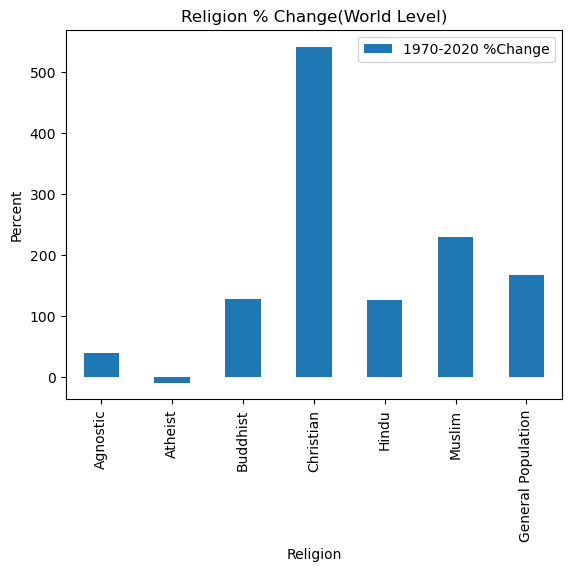

In [128]:
pc_world.plot.bar(x='Religion', y=['1970-2020 %Change'], ylabel='Percent', title='Religion % Change(World Level)')

<Axes: title={'center': 'Religion % Change(World Level)'}, xlabel='Religion', ylabel='Percent'>

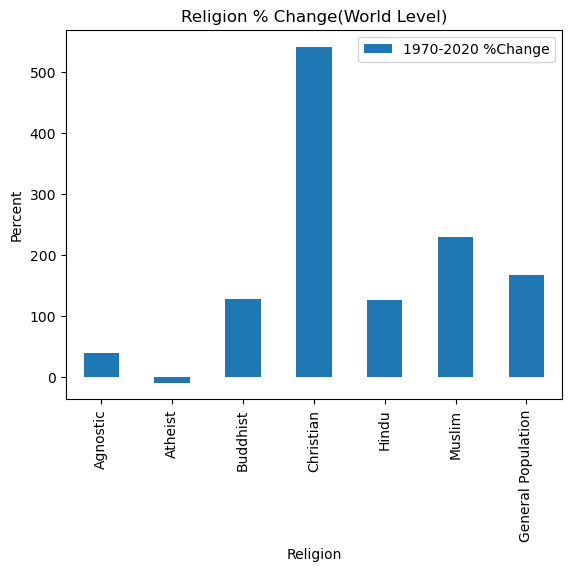

In [129]:
pc_world.plot.bar(x='Religion', y=['1970-2020 %Change'], ylabel='Percent', title='Religion % Change(World Level)')

<Axes: title={'center': 'Religion % Change(World Level)'}, xlabel='Religion', ylabel='Percent'>

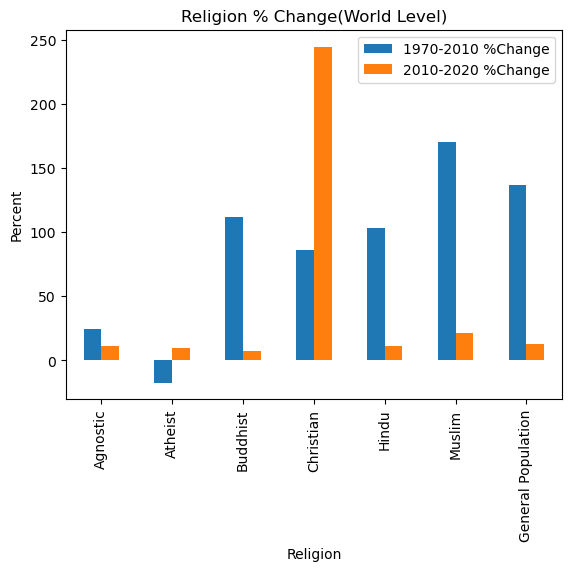

In [130]:
pc_world.plot.bar(x='Religion', y=['1970-2010 %Change','2010-2020 %Change'], ylabel='Percent', title='Religion % Change(World Level)')

Highest % Growth: Atheist

Lowest % Growth: Buddhist

Greater than Population % Growth: Muslim, Agnostic, Atheist

Less than Population % Growth: Christian, Hindu, Buddhist

# % change Continent Level

In [136]:
pc_continent = continent

In [137]:
pc_continent['1970-2010 %Change'] = round(((continent['2010'] - continent['1970']) / continent['1970']) * 100,2)

In [138]:
pc_continent['2010-2020 %Change'] = round(((continent['2020'] - continent['2010']) / continent['2010']) * 100,2)

In [139]:
pc_continent['1970-2020 %Change'] = round(((continent['2020'] - continent['1970']) / continent['1970']) * 100,2)

In [140]:
pc_continent=pc_continent[['Religion','Region', '1970-2010 %Change','2010-2020 %Change','1970-2020 %Change']]

In [141]:
pc_continent2= pc_continent

In [142]:
pc_continent2=pc_continent2.rename(columns = {'1970-2010 %Change':'1970-2010','2010-2020 %Change':'2010-2020','1970-2020 %Change':'1970-2020'})

In [143]:
pc_continent_v = pc_continent2.set_index(['Religion','Region']).stack()

In [144]:
pc_continent_v = pc_continent_v.reset_index(name='Percent Change')

In [145]:
pc_continent_v = pc_continent_v.rename(columns={'level_2': 'Year'})

In [146]:
pc_continent

,Religion,Region,1970-2010 %Change,2010-2020 %Change,1970-2020 %Change
0,Agnostic,Africa,1004.93,26.44,1297.11
1,Agnostic,Asia,15.47,8.47,25.25
2,Agnostic,Europe,6.61,8.62,15.80
3,Agnostic,Latin America,209.75,20.75,274.01
4,Agnostic,Northern America,323.99,33.33,465.29
5,Agnostic,Oceania,739.38,49.77,1157.17
6,Atheist,Africa,454.37,29.42,617.48
7,Atheist,Asia,4.93,2.88,7.95
8,Atheist,Europe,-70.83,-3.77,-71.93
9,Atheist,Latin America,129.23,10.41,153.10


In [147]:
pc_continent_v

,Religion,Region,Year,Percent Change
0,Agnostic,Africa,1970-2010,1004.93
1,Agnostic,Africa,2010-2020,26.44
2,Agnostic,Africa,1970-2020,1297.11
3,Agnostic,Asia,1970-2010,15.47
4,Agnostic,Asia,2010-2020,8.47
...,...,...,...,...
121,General Population,Northern America,2010-2020,7.07
122,General Population,Northern America,1970-2020,66.26
123,General Population,Oceania,1970-2010,87.84
124,General Population,Oceania,2010-2020,16.63


In [148]:
pc_continent.loc[pc_continent.groupby('Region')['1970-2020 %Change'].idxmax()]

,Religion,Region,1970-2010 %Change,2010-2020 %Change,1970-2020 %Change
12,Buddhist,Africa,2070.94,43.70,3019.66
19,Christian,Asia,251.18,10.48,287.97
26,Hindu,Europe,330.60,21.20,421.88
33,Muslim,Latin America,259.46,16.11,317.37
10,Atheist,Northern America,618.67,391.05,3429.00
17,Buddhist,Oceania,3425.53,66.95,5785.89


In [149]:
pc_continent.loc[pc_continent.groupby('Region')['1970-2020 %Change'].idxmin()]

,Religion,Region,1970-2010 %Change,2010-2020 %Change,1970-2020 %Change
24,Hindu,Africa,193.00,21.33,255.50
7,Atheist,Asia,4.93,2.88,7.95
8,Atheist,Europe,-70.83,-3.77,-71.93
39,General Population,Latin America,16.07,10.83,28.63
40,General Population,Northern America,55.29,7.07,66.26
41,General Population,Oceania,87.84,16.63,119.07


# % change UNregion Level

In [151]:
pc_unregion = unregion

In [152]:
pc_unregion['1970-2010 %Change'] = round(((unregion['2010'] - unregion['1970']) / unregion['1970']) * 100,2)

In [153]:
pc_unregion['2010-2020 %Change'] = round(((unregion['2020'] - unregion['2010']) / unregion['2010']) * 100,2)

In [154]:
pc_unregion['1970-2020 %Change'] = round(((unregion['2020'] - unregion['1970']) / unregion['1970']) * 100,2)

In [155]:
pc_unregion=pc_unregion[['Religion','Region', '1970-2010 %Change','2010-2020 %Change','1970-2020 %Change']]

In [156]:
pc_unregion2= pc_unregion

In [157]:
pc_unregion2=pc_unregion2.rename(columns = {'1970-2010 %Change':'1970-2010','2010-2020 %Change':'2010-2020','1970-2020 %Change':'1970-2020'})

In [158]:
pc_unregion_v = pc_unregion2.set_index(['Religion','Region']).stack()

In [159]:
pc_unregion_v = pc_unregion_v.reset_index(name='Percent Change')

In [160]:
pc_unregion_v = pc_unregion_v.rename(columns={'level_2': 'Year'})

In [161]:
pc_unregion

,Religion,Region,1970-2010 %Change,2010-2020 %Change,1970-2020 %Change
0,Agnostic,Eastern Africa,1422.28,28.10,1850.09
1,Agnostic,Middle Africa,2013.37,47.73,3022.09
2,Agnostic,Northern Africa,455.70,27.15,606.58
3,Agnostic,Southern Africa,1731.13,18.41,2068.21
4,Agnostic,Western Africa,642.86,31.56,877.31
...,...,...,...,...,...
142,General Population,Northern America,55.29,7.07,66.26
143,General Population,Australia/New Zealand,72.75,13.83,96.65
144,General Population,Melanesia,158.15,27.18,228.31
145,General Population,Micronesia,108.56,2.43,113.62


In [162]:
pc_unregion_v

,Religion,Region,Year,Percent Change
0,Agnostic,Eastern Africa,1970-2010,1422.28
1,Agnostic,Eastern Africa,2010-2020,28.10
2,Agnostic,Eastern Africa,1970-2020,1850.09
3,Agnostic,Middle Africa,1970-2010,2013.37
4,Agnostic,Middle Africa,2010-2020,47.73
...,...,...,...,...
436,General Population,Micronesia,2010-2020,2.43
437,General Population,Micronesia,1970-2020,113.62
438,General Population,Polynesia,1970-2010,61.39
439,General Population,Polynesia,2010-2020,1.63


In [163]:
pc_unregion.loc[pc_unregion.groupby('Region')['1970-2020 %Change'].idxmax()]

,Religion,Region,1970-2010 %Change,2010-2020 %Change,1970-2020 %Change
59,Buddhist,Australia/New Zealand,4094.03,69.22,6997.01
76,Christian,Caribbean,74.38,25.19,118.30
98,Hindu,Central America,1700.00,22.78,2110.00
21,Atheist,Eastern Africa,1722.58,32.74,2319.35
68,Christian,Eastern Asia,1017.30,0.68,1024.94
93,Hindu,Eastern Europe,4769900.00,4.82,4999900.00
18,Agnostic,Melanesia,738.20,31.10,998.88
61,Buddhist,Micronesia,2500.00,-4.40,2385.71
85,Hindu,Middle Africa,9830.00,36.96,13500.00
86,Hindu,Northern Africa,739900.00,16.22,859900.00


In [164]:
pc_unregion.loc[pc_unregion.groupby('Region')['1970-2020 %Change'].idxmin()]

,Religion,Region,1970-2010 %Change,2010-2020 %Change,1970-2020 %Change
143,General Population,Australia/New Zealand,72.75,13.83,96.65
13,Agnostic,Caribbean,0.65,0.00,0.65
140,General Population,Central America,128.96,15.26,163.90
84,Hindu,Eastern Africa,186.32,20.29,244.40
26,Atheist,Eastern Asia,6.46,2.49,9.12
30,Atheist,Eastern Europe,-89.77,-21.36,-91.95
102,Hindu,Melanesia,35.80,4.60,42.05
124,Muslim,Micronesia,41.79,15.79,64.18
127,General Population,Middle Africa,210.83,41.76,340.64
65,Christian,Northern Africa,221.09,-30.39,123.52


# % Change UN Indicators: World Level (1970-2010)

In [166]:
un_world_70_10=un_world.loc[un_world['Time'].between(1970,2010)]

In [167]:
un_world_70_10=un_world_70_10.transpose().reset_index()

In [168]:
un_world_70_10=un_world_70_10[['index',35588, 35628]]

In [169]:
un_world_70_10['Year']='1970-2010'

In [170]:
un_world_70_10['Region']='World'

In [171]:
un_world_70_10=un_world_70_10.rename(columns={'index':'Indicators'})

In [172]:
drop_list=[0,1,2,3,8]

In [173]:
un_world_70_10=un_world_70_10.drop(drop_list)

In [174]:
un_world_70_10['Percent Change']=((un_world_70_10[35628]-un_world_70_10[35588])/un_world_70_10[35588]*100)

In [175]:
un_world_70_10=un_world_70_10[['Indicators','Region','Year', 'Percent Change']]

# % Change UN Indicators: World Level (1970-2010)

In [177]:
un_world_10_20=un_world.loc[un_world['Time'].between(2010,2020)]

In [178]:
un_world_10_20=un_world_10_20.transpose().reset_index()

In [179]:
un_world_10_20

,index,35628,35629,35630,35631,35632,35633,35634,35635,35636,35637,35638
0,Time,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Location,World,World,World,World,World,World,World,World,World,World,World
2,LocTypeName,World,World,World,World,World,World,World,World,World,World,World
3,ISO3_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Births,143354.237,143878.789,146054.881,145014.783,145268.255,144333.945,144854.1,143601.801,140332.732,138596.791,134719.611
5,CBR,20.416,20.233,20.282,19.887,19.68,19.321,19.164,18.782,18.155,17.743,17.081
6,TFR,2.6021,2.5881,2.6069,2.5724,2.5644,2.537,2.5359,2.5036,2.4367,2.3968,2.3216
7,NRR,1.1595,1.1561,1.1692,1.1573,1.1561,1.1462,1.1482,1.1364,1.109,1.0929,1.0627
8,PopGrowthRate,1.269,1.256,1.267,1.233,1.216,1.178,1.166,1.125,1.068,1.027,0.902
9,Population,6977189.237,7066275.059,7155572.472,7246832.497,7336754.673,7426477.815,7514505.928,7602603.123,7688632.785,7771172.776,7851414.621


In [180]:
un_world_10_20=un_world_10_20[['index',35628, 35638]]

In [181]:
un_world_10_20['Year']='2010-2020'

C:\Users\graft\AppData\Local\Temp\ipykernel_265620\2284356216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  un_world_10_20['Year']='2010-2020'


In [182]:
un_world_10_20['Region']='World'

C:\Users\graft\AppData\Local\Temp\ipykernel_265620\1587197601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  un_world_10_20['Region']='World'


In [183]:
un_world_10_20=un_world_10_20.rename(columns={'index':'Indicators'})

In [184]:
un_world_10_20

,Indicators,35628,35638,Year,Region
0,Time,2010,2020,2010-2020,World
1,Location,World,World,2010-2020,World
2,LocTypeName,World,World,2010-2020,World
3,ISO3_code,NaN,NaN,2010-2020,World
4,Births,143354.237,134719.611,2010-2020,World
5,CBR,20.416,17.081,2010-2020,World
6,TFR,2.6021,2.3216,2010-2020,World
7,NRR,1.1595,1.0627,2010-2020,World
8,PopGrowthRate,1.269,0.902,2010-2020,World
9,Population,6977189.237,7851414.621,2010-2020,World


In [185]:
drop_list=[0,1,2,3,8]

In [186]:
un_world_10_20=un_world_10_20.drop(drop_list)

In [187]:
un_world_10_20['Percent Change']=((un_world_10_20[35638]-un_world_10_20[35628])/un_world_10_20[35628]*100)

In [188]:
un_world_10_20=un_world_10_20[['Indicators','Region','Year', 'Percent Change']]

In [189]:
un_world_10_20

,Indicators,Region,Year,Percent Change
4,Births,World,2010-2020,-6.023279
5,CBR,World,2010-2020,-16.335227
6,TFR,World,2010-2020,-10.779755
7,NRR,World,2010-2020,-8.348426
9,Population,World,2010-2020,12.529765


# % Change UN Indicators: World Level (1970-2010)

In [191]:
list11=[1970,2020]

In [192]:
un_world_70_20=un_world.loc[un_world['Time'].isin(list11)]

In [193]:
un_world_70_20=un_world_70_20.transpose().reset_index()

In [194]:
un_world_70_20

,index,35588,35638
0,Time,1970,2020
1,Location,World,World
2,LocTypeName,World,World
3,ISO3_code,NaN,NaN
4,Births,124135.907,134719.611
5,CBR,33.599,17.081
6,TFR,4.8251,2.3216
7,NRR,1.8755,1.0627
8,PopGrowthRate,2.056,0.902
9,Population,3656697.561,7851414.621


In [195]:
un_world_70_20=un_world_70_20[['index',35588, 35638]]

In [196]:
un_world_70_20['Year']='1970-2020'

In [197]:
un_world_70_20['Region']='World'

In [198]:
un_world_70_20=un_world_70_20.rename(columns={'index':'Indicators'})

In [199]:
drop_list=[0,1,2,3,8]

In [200]:
un_world_70_20=un_world_70_20.drop(drop_list)

In [201]:
un_world_70_20['Percent Change']=((un_world_70_20[35638]-un_world_70_20[35588])/un_world_70_20[35588]*100)

In [202]:
un_world_70_20=un_world_70_20[['Indicators','Region','Year', 'Percent Change']]

# % Change UN Indicators: Continent Level (1970-2010)

In [204]:
un_continent

,index,Time,Location,LocTypeName,ISO3_code,Births,CBR,TFR,NRR,PopGrowthRate,Population
0,0,1950,Africa,Geographic region,NaN,10878.554,47.760,6.5162,1.8138,2.052,225440.040
1,1,1951,Africa,Geographic region,NaN,11138.514,47.896,6.5296,1.8404,2.102,230112.798
2,2,1952,Africa,Geographic region,NaN,11398.576,47.986,6.5411,1.8647,2.137,235001.139
3,3,1953,Africa,Geographic region,NaN,11669.182,48.084,6.5584,1.8903,2.149,240077.942
4,4,1954,Africa,Geographic region,NaN,11924.006,48.080,6.5694,1.9134,2.188,245292.210
...,...,...,...,...,...,...,...,...,...,...,...
907,907,2097,Latin America,NaN,NaN,14842.506,17.145,3.2903,1.5978,-0.383,1725134.718
908,908,2098,Latin America,NaN,NaN,14767.885,17.123,3.2887,1.5972,-0.383,1718534.988
909,909,2099,Latin America,NaN,NaN,14703.652,17.111,3.2893,1.5977,-0.388,1711868.764
910,910,2100,Latin America,NaN,NaN,14628.260,17.090,3.2877,1.5970,-0.388,1705218.645


In [205]:
list1=[1970,2010]

In [206]:
un_continent_70_10=un_continent.loc[un_continent['Time'].isin(list1)]

In [207]:
un_world_70_10

,Indicators,Region,Year,Percent Change
4,Births,World,1970-2010,15.481685
5,CBR,World,1970-2010,-39.236287
6,TFR,World,1970-2010,-46.071584
7,NRR,World,1970-2010,-38.176486
9,Population,World,1970-2010,90.805751


In [208]:
un_continent_70_10=un_continent_70_10.drop(columns={'LocTypeName','ISO3_code', 'index', 'PopGrowthRate'}).reset_index(drop=True)
un_continent_70_10

,Time,Location,Births,CBR,TFR,NRR,Population
0,1970,Africa,17149.970,46.915,6.6879,2.2018,360703.245
1,2010,Africa,39685.493,37.013,4.8905,2.0168,1058249.434
2,1970,Asia,81210.591,37.992,5.5909,2.1188,2111391.852
3,2010,Asia,79595.720,18.773,2.3225,1.0404,4215013.658
4,1970,Europe,10564.868,16.081,2.2826,1.0663,655376.513
5,2010,Europe,8236.451,11.158,1.6056,0.7693,737549.640
6,1970,Northern America,4252.364,18.542,2.4912,1.1731,227745.746
7,2010,Northern America,4358.462,12.619,1.8899,0.9101,343670.804
8,1970,Oceania,488.869,25.078,3.5659,1.6008,19223.115
9,2010,Oceania,678.428,18.211,2.5235,1.1729,36937.684


In [209]:
un_continent_70_10_africa = un_continent_70_10.loc[un_continent_70_10['Location']=='Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [210]:
un_continent_70_10_africa['Percent Change']=((un_continent_70_10_africa[1]-un_continent_70_10_africa[0])/un_continent_70_10_africa[0]*100)

In [211]:
un_continent_70_10_africa['Year']='1970-2010'

In [212]:
un_continent_70_10_africa['Region']='Africa'

In [213]:
un_continent_70_10_africa=un_continent_70_10_africa[['Indicators','Region','Year', 'Percent Change']]

In [214]:
un_continent_70_10_asia = un_continent_70_10.loc[un_continent_70_10['Location']=='Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [215]:
un_continent_70_10_asia['Percent Change']=((un_continent_70_10_asia[3]-un_continent_70_10_asia[2])/un_continent_70_10_asia[2]*100)

In [216]:
un_continent_70_10_asia['Year']='1970-2010'

In [217]:
un_continent_70_10_asia['Region']='Asia'

In [218]:
un_continent_70_10_asia=un_continent_70_10_asia[['Indicators','Region','Year', 'Percent Change']]

In [219]:
un_continent_70_10_europe = un_continent_70_10.loc[un_continent_70_10['Location']=='Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [220]:
un_continent_70_10_europe['Percent Change']=((un_continent_70_10_europe[5]-un_continent_70_10_europe[4])/un_continent_70_10_europe[4]*100)

In [221]:
un_continent_70_10_europe['Year']='1970-2010'

In [222]:
un_continent_70_10_europe['Region']='Europe'

In [223]:
un_continent_70_10_europe=un_continent_70_10_europe[['Indicators','Region','Year', 'Percent Change']]

In [224]:
un_continent_70_10_northern_america = un_continent_70_10.loc[un_continent_70_10['Location']=='Northern America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [225]:
un_continent_70_10_northern_america['Percent Change']=((un_continent_70_10_northern_america[7]-un_continent_70_10_northern_america[6])/un_continent_70_10_northern_america[6]*100)

In [226]:
un_continent_70_10_northern_america['Year']='1970-2010'

In [227]:
un_continent_70_10_northern_america['Region']='Northern America'

In [228]:
un_continent_70_10_northern_america=un_continent_70_10_northern_america[['Indicators','Region','Year', 'Percent Change']]

In [229]:
un_continent_70_10_oceania = un_continent_70_10.loc[un_continent_70_10['Location']=='Oceania'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [230]:
un_continent_70_10_oceania['Percent Change']=((un_continent_70_10_oceania[9]-un_continent_70_10_oceania[8])/un_continent_70_10_oceania[8]*100)

In [231]:
un_continent_70_10_oceania['Year']='1970-2010'

In [232]:
un_continent_70_10_oceania['Region']='Oceania'

In [233]:
un_continent_70_10_oceania=un_continent_70_10_oceania[['Indicators','Region','Year', 'Percent Change']]

In [234]:
un_continent_70_10_latin_america = un_continent_70_10.loc[un_continent_70_10['Location']=='Latin America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [235]:
un_continent_70_10_latin_america['Percent Change']=((un_continent_70_10_latin_america[11]-un_continent_70_10_latin_america[10])/un_continent_70_10_latin_america[10]*100)

In [236]:
un_continent_70_10_latin_america['Year']='1970-2010'

In [237]:
un_continent_70_10_latin_america['Region']='Latin America'

In [238]:
un_continent_70_10_latin_america=un_continent_70_10_latin_america[['Indicators','Region','Year', 'Percent Change']]

In [239]:
un_continent_70_10_latin_america

,Indicators,Region,Year,Percent Change
2,Births,Latin America,1970-2010,3.044653
3,CBR,Latin America,1970-2010,-47.007053
4,TFR,Latin America,1970-2010,-53.192212
5,NRR,Latin America,1970-2010,-47.266319
6,Population,Latin America,1970-2010,91.251228


# % Change UN Indicators: Continent Level (2010-2020)

In [241]:
list2=[2010,2020]

In [242]:
list12=[1970,2020]

In [243]:
un_continent_10_20=un_continent.loc[un_continent['Time'].isin(list2)]

In [244]:
un_continent_70_20=un_continent.loc[un_continent['Time'].isin(list12)]

In [245]:
un_continent_10_20=un_continent_10_20.drop(columns={'LocTypeName','ISO3_code', 'index', 'PopGrowthRate'}).reset_index(drop=True)


In [246]:
un_continent_70_20=un_continent_70_20.drop(columns={'LocTypeName','ISO3_code', 'index', 'PopGrowthRate'}).reset_index(drop=True)


In [247]:
un_continent_10_20_africa = un_continent_10_20.loc[un_continent_10_20['Location']=='Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [248]:
un_continent_70_20_africa = un_continent_70_20.loc[un_continent_70_20['Location']=='Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [249]:
un_continent_10_20_africa['Percent Change']=((un_continent_10_20_africa[1]-un_continent_10_20_africa[0])/un_continent_10_20_africa[0]*100)

In [250]:
un_continent_70_20_africa['Percent Change']=((un_continent_70_20_africa[1]-un_continent_70_20_africa[0])/un_continent_70_20_africa[0]*100)

In [251]:
un_continent_10_20_africa['Year']='2010-2020'

In [252]:
un_continent_70_20_africa['Year']='1970-2020'

In [253]:
un_continent_10_20_africa['Region']='Africa'

In [254]:
un_continent_70_20_africa['Region']='Africa'

In [255]:
un_continent_10_20_africa=un_continent_10_20_africa[['Indicators','Region','Year', 'Percent Change']]

In [256]:
un_continent_70_20_africa=un_continent_70_20_africa[['Indicators','Region','Year', 'Percent Change']]

In [257]:
un_continent_10_20_asia = un_continent_10_20.loc[un_continent_10_20['Location']=='Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [258]:
un_continent_70_20_asia = un_continent_70_20.loc[un_continent_70_20['Location']=='Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [259]:
un_continent_10_20_asia['Percent Change']=((un_continent_10_20_asia[3]-un_continent_10_20_asia[2])/un_continent_10_20_asia[2]*100)

In [260]:
un_continent_70_20_asia['Percent Change']=((un_continent_70_20_asia[3]-un_continent_70_20_asia[2])/un_continent_70_20_asia[2]*100)

In [261]:
un_continent_10_20_asia['Year']='2010-2020'

In [262]:
un_continent_70_20_asia['Year']='1970-2020'

In [263]:
un_continent_10_20_asia['Region']='Asia'

In [264]:
un_continent_70_20_asia['Region']='Asia'

In [265]:
un_continent_10_20_asia=un_continent_10_20_asia[['Indicators','Region','Year', 'Percent Change']]

In [266]:
un_continent_70_20_asia=un_continent_70_20_asia[['Indicators','Region','Year', 'Percent Change']]

In [267]:
un_continent_10_20_europe = un_continent_10_20.loc[un_continent_10_20['Location']=='Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [268]:
un_continent_70_20_europe = un_continent_70_20.loc[un_continent_70_20['Location']=='Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [269]:
un_continent_10_20_europe['Percent Change']=((un_continent_10_20_europe[5]-un_continent_10_20_europe[4])/un_continent_10_20_europe[4]*100)

In [270]:
un_continent_70_20_europe['Percent Change']=((un_continent_70_20_europe[5]-un_continent_70_20_europe[4])/un_continent_70_20_europe[4]*100)

In [271]:
un_continent_10_20_europe['Year']='2010-2020'

In [272]:
un_continent_70_20_europe['Year']='1970-2020'

In [273]:
un_continent_10_20_europe['Region']='Europe'

In [274]:
un_continent_70_20_europe['Region']='Europe'

In [275]:
un_continent_10_20_europe=un_continent_10_20_europe[['Indicators','Region','Year', 'Percent Change']]

In [276]:
un_continent_70_20_europe=un_continent_70_20_europe[['Indicators','Region','Year', 'Percent Change']]

In [277]:
un_continent_10_20_northern_america = un_continent_10_20.loc[un_continent_10_20['Location']=='Northern America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [278]:
un_continent_70_20_northern_america = un_continent_70_20.loc[un_continent_70_20['Location']=='Northern America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [279]:
un_continent_10_20_northern_america['Percent Change']=((un_continent_10_20_northern_america[7]-un_continent_10_20_northern_america[6])/un_continent_10_20_northern_america[6]*100)

In [280]:
un_continent_70_20_northern_america['Percent Change']=((un_continent_70_20_northern_america[7]-un_continent_70_20_northern_america[6])/un_continent_70_20_northern_america[6]*100)

In [281]:
un_continent_10_20_northern_america['Year']='2010-2020'

In [282]:
un_continent_70_20_northern_america['Year']='1970-2020'

In [283]:
un_continent_10_20_northern_america['Region']='Northern America'

In [284]:
un_continent_70_20_northern_america['Region']='Northern America'

In [285]:
un_continent_10_20_northern_america=un_continent_10_20_northern_america[['Indicators','Region','Year', 'Percent Change']]

In [286]:
un_continent_70_20_northern_america=un_continent_70_20_northern_america[['Indicators','Region','Year', 'Percent Change']]

In [287]:
un_continent_10_20_oceania = un_continent_10_20.loc[un_continent_10_20['Location']=='Oceania'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [288]:
un_continent_70_20_oceania = un_continent_70_20.loc[un_continent_70_20['Location']=='Oceania'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [289]:
un_continent_10_20_oceania['Percent Change']=((un_continent_10_20_oceania[9]-un_continent_10_20_oceania[8])/un_continent_10_20_oceania[8]*100)

In [290]:
un_continent_70_20_oceania['Percent Change']=((un_continent_70_20_oceania[9]-un_continent_70_20_oceania[8])/un_continent_70_20_oceania[8]*100)

In [291]:
un_continent_10_20_oceania['Year']='2010-2020'

In [292]:
un_continent_70_20_oceania['Year']='1970-2020'

In [293]:
un_continent_10_20_oceania['Region']='Oceania'

In [294]:
un_continent_70_20_oceania['Region']='Oceania'

In [295]:
un_continent_10_20_oceania=un_continent_10_20_oceania[['Indicators','Region','Year', 'Percent Change']]

In [296]:
un_continent_70_20_oceania=un_continent_70_20_oceania[['Indicators','Region','Year', 'Percent Change']]

In [297]:
un_continent_10_20_latin_america = un_continent_10_20.loc[un_continent_10_20['Location']=='Latin America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [298]:
un_continent_70_20_latin_america = un_continent_70_20.loc[un_continent_70_20['Location']=='Latin America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1])

In [299]:
un_continent_10_20_latin_america['Percent Change']=((un_continent_10_20_latin_america[11]-un_continent_10_20_latin_america[10])/un_continent_10_20_latin_america[10]*100)

In [300]:
un_continent_70_20_latin_america['Percent Change']=((un_continent_70_20_latin_america[11]-un_continent_70_20_latin_america[10])/un_continent_70_20_latin_america[10]*100)

In [301]:
un_continent_10_20_latin_america['Year']='2010-2020'

In [302]:
un_continent_70_20_latin_america['Year']='1970-2020'

In [303]:
un_continent_10_20_latin_america['Region']='Latin America'

In [304]:
un_continent_70_20_latin_america['Region']='Latin America'

In [305]:
un_continent_10_20_latin_america=un_continent_10_20_latin_america[['Indicators','Region','Year', 'Percent Change']]

In [306]:
un_continent_17_20_latin_america=un_continent_70_20_latin_america[['Indicators','Region','Year', 'Percent Change']]

# % Change UN Indicators: Region Level (1970-2010) and (2010-2020)

In [308]:
un_unregion

,level_0,index,Time,Location,LocTypeName,ISO3_code,Births,CBR,TFR,NRR,PopGrowthRate,Population
0,0,0,1950,Eastern Africa,Subregion,NaN,3174.030,48.285,6.6872,1.9300,2.143,65031.204
1,1,1,1951,Eastern Africa,Subregion,NaN,3253.248,48.423,6.6959,1.9529,2.213,66440.070
2,2,2,1952,Eastern Africa,Subregion,NaN,3336.578,48.567,6.7102,1.9779,2.251,67926.815
3,3,3,1953,Eastern Africa,Subregion,NaN,3421.888,48.698,6.7264,2.0018,2.263,69472.902
4,4,4,1954,Eastern Africa,Subregion,NaN,3504.387,48.743,6.7374,2.0252,2.318,71062.656
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,3187,603,2097,Northern America,Geographic region,NaN,4350.862,9.206,1.6341,0.7928,0.180,472187.114
3188,3188,604,2098,Northern America,Geographic region,NaN,4355.349,9.200,1.6322,0.7919,0.166,473036.954
3189,3189,605,2099,Northern America,Geographic region,NaN,4365.654,9.206,1.6329,0.7923,0.165,473823.534
3190,3190,606,2100,Northern America,Geographic region,NaN,4366.572,9.193,1.6303,0.7911,0.151,474607.053


In [309]:
list3=[1970,2010]

In [310]:
list4=[2010,2020]

In [311]:
list9=[1970,2020]

In [312]:
un_unregion_70_10=un_unregion.loc[un_unregion['Time'].isin(list3)]

In [313]:
un_unregion_10_20=un_unregion.loc[un_unregion['Time'].isin(list4)]

In [314]:
un_unregion_70_20=un_unregion.loc[un_unregion['Time'].isin(list9)]

In [315]:
un_unregion_70_10=un_unregion_70_10.drop(columns={'LocTypeName','ISO3_code', 'index', 'PopGrowthRate'}).reset_index(drop=True)



In [316]:
un_unregion_10_20=un_unregion_10_20.drop(columns={'LocTypeName','ISO3_code', 'index', 'PopGrowthRate'}).reset_index(drop=True)


In [317]:
un_unregion_70_20=un_unregion_70_20.drop(columns={'LocTypeName','ISO3_code', 'index', 'PopGrowthRate'}).reset_index(drop=True)


In [318]:
un_unregion_70_10_eastern_africa = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Eastern Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [319]:
un_unregion_10_20_eastern_africa = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Eastern Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [320]:
un_unregion_70_20_eastern_africa = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Eastern Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [321]:
un_unregion_70_10_eastern_africa

,Indicators,0,1
3,Births,5401.18,13394.702
4,CBR,49.198,38.794
5,TFR,7.0567,5.2114
6,NRR,2.3631,2.1948
7,Population,108200.931,340303.391


In [322]:
un_unregion_10_20_eastern_africa

,Indicators,0,1
3,Births,13394.702,15279.409
4,CBR,38.794,33.864
5,TFR,5.2114,4.3392
6,NRR,2.1948,1.9418
7,Population,340303.391,445111.122


In [323]:
un_unregion_70_20_eastern_africa

,Indicators,0,1
3,Births,5401.18,15279.409
4,CBR,49.198,33.864
5,TFR,7.0567,4.3392
6,NRR,2.3631,1.9418
7,Population,108200.931,445111.122


In [324]:
un_unregion_70_10_eastern_africa['Percent Change']=((un_unregion_70_10_eastern_africa[1]-un_unregion_70_10_eastern_africa[0])/un_unregion_70_10_eastern_africa[0]*100)

In [325]:
un_unregion_10_20_eastern_africa['Percent Change']=((un_unregion_10_20_eastern_africa[1]-un_unregion_10_20_eastern_africa[0])/un_unregion_10_20_eastern_africa[0]*100)

In [326]:
un_unregion_70_20_eastern_africa['Percent Change']=((un_unregion_70_20_eastern_africa[1]-un_unregion_70_20_eastern_africa[0])/un_unregion_70_20_eastern_africa[0]*100)

In [327]:
un_unregion_70_10_eastern_africa['Year']='1970-2010'

In [328]:
un_unregion_10_20_eastern_africa['Year']='2010-2020'

In [329]:
un_unregion_70_20_eastern_africa['Year']='1970-2020'

In [330]:
un_unregion_70_10_eastern_africa['Region']='Eastern Africa'

In [331]:
un_unregion_10_20_eastern_africa['Region']='Eastern Africa'

In [332]:
un_unregion_70_20_eastern_africa['Region']='Eastern Africa'

In [333]:
un_unregion_70_10_eastern_africa=un_unregion_70_10_eastern_africa[['Indicators','Region','Year', 'Percent Change']]

In [334]:
un_unregion_10_20_eastern_africa=un_unregion_10_20_eastern_africa[['Indicators','Region','Year', 'Percent Change']]

In [335]:
un_unregion_70_20_eastern_africa=un_unregion_70_20_eastern_africa[['Indicators','Region','Year', 'Percent Change']]

In [336]:
un_unregion_70_10_eastern_africa

,Indicators,Region,Year,Percent Change
3,Births,Eastern Africa,1970-2010,147.995845
4,CBR,Eastern Africa,1970-2010,-21.147201
5,TFR,Eastern Africa,1970-2010,-26.149617
6,NRR,Eastern Africa,1970-2010,-7.122001
7,Population,Eastern Africa,1970-2010,214.510594


In [337]:
un_unregion_10_20_eastern_africa

,Indicators,Region,Year,Percent Change
3,Births,Eastern Africa,2010-2020,14.070541
4,CBR,Eastern Africa,2010-2020,-12.708151
5,TFR,Eastern Africa,2010-2020,-16.736386
6,NRR,Eastern Africa,2010-2020,-11.527246
7,Population,Eastern Africa,2010-2020,30.798321


In [338]:
un_unregion_70_10_western_europe = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Western Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [339]:
un_unregion_10_20_western_europe = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Western Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [340]:
un_unregion_70_20_western_europe = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Western Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [341]:
un_unregion_70_10_western_europe

,Indicators,22,23
3,Births,2492.217,1959.473
4,CBR,15.038,10.383
5,TFR,2.2287,1.6789
6,NRR,1.0515,0.8126
7,Population,165462.594,188426.54


In [342]:
un_unregion_10_20_western_europe

,Indicators,22,23
3,Births,1959.473,1933.596
4,CBR,10.383,9.816
5,TFR,1.6789,1.6096
6,NRR,0.8126,0.7788
7,Population,188426.54,196790.392


In [343]:
un_unregion_70_10_western_europe['Percent Change']=((un_unregion_70_10_western_europe[23]-un_unregion_70_10_western_europe[22])/un_unregion_70_10_western_europe[22]*100)

In [344]:
un_unregion_10_20_western_europe['Percent Change']=((un_unregion_10_20_western_europe[23]-un_unregion_10_20_western_europe[22])/un_unregion_10_20_western_europe[22]*100)

In [345]:
un_unregion_70_20_western_europe['Percent Change']=((un_unregion_70_20_western_europe[23]-un_unregion_70_20_western_europe[22])/un_unregion_70_20_western_europe[22]*100)

In [346]:
un_unregion_70_10_western_europe['Year']='1970-2010'

In [347]:
un_unregion_10_20_western_europe['Year']='2010-2020'

In [348]:
un_unregion_70_20_western_europe['Year']='1970-2020'

In [349]:
un_unregion_70_10_western_europe['Region']='Western Europe'

In [350]:
un_unregion_10_20_western_europe['Region']='Western Europe'

In [351]:
un_unregion_70_20_western_europe['Region']='Western Europe'

In [352]:
un_unregion_70_10_western_europe=un_unregion_70_10_western_europe[['Indicators','Region','Year', 'Percent Change']]

In [353]:
un_unregion_10_20_western_europe=un_unregion_10_20_western_europe[['Indicators','Region','Year', 'Percent Change']]

In [354]:
un_unregion_70_20_western_europe=un_unregion_70_20_western_europe[['Indicators','Region','Year', 'Percent Change']]

In [355]:
un_unregion_70_10_western_europe

,Indicators,Region,Year,Percent Change
3,Births,Western Europe,1970-2010,-21.376309
4,CBR,Western Europe,1970-2010,-30.954914
5,TFR,Western Europe,1970-2010,-24.66909
6,NRR,Western Europe,1970-2010,-22.719924
7,Population,Western Europe,1970-2010,13.878633


In [356]:
un_unregion_10_20_western_europe

,Indicators,Region,Year,Percent Change
3,Births,Western Europe,2010-2020,-1.32061
4,CBR,Western Europe,2010-2020,-5.460849
5,TFR,Western Europe,2010-2020,-4.127703
6,NRR,Western Europe,2010-2020,-4.159488
7,Population,Western Europe,2010-2020,4.438787


In [357]:
un_unregion_70_10_South_central_Asia = un_unregion_70_10.loc[un_unregion_70_10['Location']=='South-central Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [358]:
un_unregion_10_20_South_central_Asia = un_unregion_10_20.loc[un_unregion_10_20['Location']=='South-central Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [359]:
un_unregion_70_20_South_central_Asia = un_unregion_70_20.loc[un_unregion_70_20['Location']=='South-central Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [360]:
un_unregion_70_10_South_central_Asia

,Indicators,38,39
3,Births,31494.215,41987.659
4,CBR,74.437,47.443
5,TFR,10.9529,5.4628
6,NRR,4.1021,2.467
7,Population,763709.228,1800313.819


In [361]:
un_unregion_10_20_South_central_Asia

,Indicators,38,39
3,Births,41987.659,39081.337
4,CBR,47.443,43.665
5,TFR,5.4628,5.383
6,NRR,2.467,2.5003
7,Population,1800313.819,2048450.375


In [362]:
un_unregion_70_10_South_central_Asia['Percent Change']=((un_unregion_70_10_South_central_Asia[39]-un_unregion_70_10_South_central_Asia[38])/un_unregion_70_10_South_central_Asia[38]*100)

In [363]:
un_unregion_10_20_South_central_Asia['Percent Change']=((un_unregion_10_20_South_central_Asia[39]-un_unregion_10_20_South_central_Asia[38])/un_unregion_10_20_South_central_Asia[38]*100)

In [364]:
un_unregion_70_20_South_central_Asia['Percent Change']=((un_unregion_70_20_South_central_Asia[39]-un_unregion_70_20_South_central_Asia[38])/un_unregion_70_20_South_central_Asia[38]*100)

In [365]:
un_unregion_70_10_South_central_Asia['Year']='1970-2010'

In [366]:
un_unregion_10_20_South_central_Asia['Year']='2010-2020'

In [367]:
un_unregion_70_20_South_central_Asia['Year']='1970-2020'

In [368]:
un_unregion_70_10_South_central_Asia['Region']='South-central Asia'

In [369]:
un_unregion_10_20_South_central_Asia['Region']='South-central Asia'

In [370]:
un_unregion_70_20_South_central_Asia['Region']='South-central Asia'

In [371]:
un_unregion_70_10_South_central_Asia=un_unregion_70_10_South_central_Asia[['Indicators','Region','Year', 'Percent Change']]

In [372]:
un_unregion_10_20_South_central_Asia=un_unregion_10_20_South_central_Asia[['Indicators','Region','Year', 'Percent Change']]

In [373]:
un_unregion_70_20_South_central_Asia=un_unregion_70_20_South_central_Asia[['Indicators','Region','Year', 'Percent Change']]

In [374]:
un_unregion_70_10_South_central_Asia

,Indicators,Region,Year,Percent Change
3,Births,South-central Asia,1970-2010,33.31864
4,CBR,South-central Asia,1970-2010,-36.264223
5,TFR,South-central Asia,1970-2010,-50.124625
6,NRR,South-central Asia,1970-2010,-39.860072
7,Population,South-central Asia,1970-2010,135.732888


In [375]:
un_unregion_10_20_South_central_Asia

,Indicators,Region,Year,Percent Change
3,Births,South-central Asia,2010-2020,-6.921848
4,CBR,South-central Asia,2010-2020,-7.96324
5,TFR,South-central Asia,2010-2020,-1.460789
6,NRR,South-central Asia,2010-2020,1.349818
7,Population,South-central Asia,2010-2020,13.782961


In [376]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Polynesia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
36,2756,1970,Polynesia,15.986,39.215,6.3189,2.713,403.319
37,2796,2010,Polynesia,15.727,23.461,3.1427,1.480,668.812


In [377]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Polynesia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
36,2796,2010,Polynesia,15.727,23.461,3.1427,1.4800,668.812
37,2806,2020,Polynesia,13.047,18.958,2.6344,1.2401,687.130


In [378]:
un_unregion_70_20.loc[un_unregion_10_20['Location']=='Polynesia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
36,2756,1970,Polynesia,15.986,39.215,6.3189,2.7130,403.319
37,2806,2020,Polynesia,13.047,18.958,2.6344,1.2401,687.130


In [379]:
un_unregion_70_10_polynesia = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Polynesia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [380]:
un_unregion_10_20_polynesia = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Polynesia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [381]:
un_unregion_70_20_polynesia = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Polynesia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [382]:
un_unregion_70_10_polynesia

,Indicators,36,37
3,Births,15.986,15.727
4,CBR,39.215,23.461
5,TFR,6.3189,3.1427
6,NRR,2.713,1.48
7,Population,403.319,668.812


In [383]:
un_unregion_10_20_polynesia

,Indicators,36,37
3,Births,15.727,13.047
4,CBR,23.461,18.958
5,TFR,3.1427,2.6344
6,NRR,1.48,1.2401
7,Population,668.812,687.13


In [384]:
un_unregion_70_10_polynesia['Percent Change']=((un_unregion_70_10_polynesia[37]-un_unregion_70_10_polynesia[36])/un_unregion_70_10_polynesia[36]*100)

In [385]:
un_unregion_10_20_polynesia['Percent Change']=((un_unregion_10_20_polynesia[37]-un_unregion_10_20_polynesia[36])/un_unregion_10_20_polynesia[36]*100)

In [386]:
un_unregion_70_20_polynesia['Percent Change']=((un_unregion_70_20_polynesia[37]-un_unregion_70_20_polynesia[36])/un_unregion_70_20_polynesia[36]*100)

In [387]:
un_unregion_70_10_polynesia['Year']='1970-2010'

In [388]:
un_unregion_10_20_polynesia['Year']='2010-2020'

In [389]:
un_unregion_70_20_polynesia['Year']='1970-2020'

In [390]:
un_unregion_70_10_polynesia['Region']='Polynesia'

In [391]:
un_unregion_10_20_polynesia['Region']='Polynesia'

In [392]:
un_unregion_70_20_polynesia['Region']='Polynesia'

In [393]:
un_unregion_70_10_polynesia=un_unregion_70_10_polynesia[['Indicators','Region','Year', 'Percent Change']]

In [394]:
un_unregion_10_20_polynesia=un_unregion_10_20_polynesia[['Indicators','Region','Year', 'Percent Change']]

In [395]:
un_unregion_70_20_polynesia=un_unregion_70_20_polynesia[['Indicators','Region','Year', 'Percent Change']]

In [396]:
un_unregion_70_10_polynesia

,Indicators,Region,Year,Percent Change
3,Births,Polynesia,1970-2010,-1.620168
4,CBR,Polynesia,1970-2010,-40.173403
5,TFR,Polynesia,1970-2010,-50.265078
6,NRR,Polynesia,1970-2010,-45.447844
7,Population,Polynesia,1970-2010,65.82705


In [397]:
un_unregion_10_20_polynesia

,Indicators,Region,Year,Percent Change
3,Births,Polynesia,2010-2020,-17.040758
4,CBR,Polynesia,2010-2020,-19.193555
5,TFR,Polynesia,2010-2020,-16.173991
6,NRR,Polynesia,2010-2020,-16.209459
7,Population,Polynesia,2010-2020,2.738886


In [398]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Melanesia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
32,2452,1970,Melanesia,144.20,42.300,6.0307,2.3415,3368.174
33,2492,2010,Melanesia,284.87,29.746,3.7481,1.6470,9445.920


In [399]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Melanesia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
32,2492,2010,Melanesia,284.870,29.746,3.7481,1.647,9445.920
33,2502,2020,Melanesia,307.341,25.488,3.2146,1.448,11943.945


In [400]:
un_unregion_70_20.loc[un_unregion_10_20['Location']=='Melanesia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
32,2452,1970,Melanesia,144.200,42.300,6.0307,2.3415,3368.174
33,2502,2020,Melanesia,307.341,25.488,3.2146,1.4480,11943.945


In [401]:
un_unregion_70_10_melanesia = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Melanesia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [402]:
un_unregion_10_20_melanesia = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Melanesia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [403]:
un_unregion_70_20_melanesia = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Melanesia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [404]:
un_unregion_70_10_melanesia

,Indicators,32,33
3,Births,144.2,284.87
4,CBR,42.3,29.746
5,TFR,6.0307,3.7481
6,NRR,2.3415,1.647
7,Population,3368.174,9445.92


In [405]:
un_unregion_10_20_melanesia

,Indicators,32,33
3,Births,284.87,307.341
4,CBR,29.746,25.488
5,TFR,3.7481,3.2146
6,NRR,1.647,1.448
7,Population,9445.92,11943.945


In [406]:
un_unregion_70_10_melanesia['Percent Change']=((un_unregion_70_10_melanesia[33]-un_unregion_70_10_melanesia[32])/un_unregion_70_10_melanesia[32]*100)

In [407]:
un_unregion_10_20_melanesia['Percent Change']=((un_unregion_10_20_melanesia[33]-un_unregion_10_20_melanesia[32])/un_unregion_10_20_melanesia[32]*100)

In [408]:
un_unregion_70_20_melanesia['Percent Change']=((un_unregion_70_20_melanesia[33]-un_unregion_70_20_melanesia[32])/un_unregion_70_20_melanesia[32]*100)

In [409]:
un_unregion_70_10_melanesia['Year']='1970-2010'

In [410]:
un_unregion_10_20_melanesia['Year']='2010-2020'

In [411]:
un_unregion_70_20_melanesia['Year']='1970-2020'

In [412]:
un_unregion_70_10_melanesia['Region']='Melanesia'

In [413]:
un_unregion_10_20_melanesia['Region']='Melanesia'

In [414]:
un_unregion_70_20_melanesia['Region']='Melanesia'

In [415]:
un_unregion_70_10_melanesia=un_unregion_70_10_melanesia[['Indicators','Region','Year', 'Percent Change']]

In [416]:
un_unregion_10_20_melanesia=un_unregion_10_20_melanesia[['Indicators','Region','Year', 'Percent Change']]

In [417]:
un_unregion_70_20_melanesia=un_unregion_70_20_melanesia[['Indicators','Region','Year', 'Percent Change']]

In [418]:
un_unregion_70_10_melanesia

,Indicators,Region,Year,Percent Change
3,Births,Melanesia,1970-2010,97.552011
4,CBR,Melanesia,1970-2010,-29.678487
5,TFR,Melanesia,1970-2010,-37.849669
6,NRR,Melanesia,1970-2010,-29.660474
7,Population,Melanesia,1970-2010,180.446319


In [419]:
un_unregion_10_20_melanesia

,Indicators,Region,Year,Percent Change
3,Births,Melanesia,2010-2020,7.88816
4,CBR,Melanesia,2010-2020,-14.31453
5,TFR,Melanesia,2010-2020,-14.233878
6,NRR,Melanesia,2010-2020,-12.082574
7,Population,Melanesia,2010-2020,26.445545


In [420]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Micronesia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
34,2604,1970,Micronesia,9.448,36.968,5.7308,2.4436,251.922
35,2644,2010,Micronesia,12.936,25.005,3.2901,1.4948,516.517


In [421]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Micronesia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
34,2644,2010,Micronesia,12.936,25.005,3.2901,1.4948,516.517
35,2654,2020,Micronesia,11.264,21.710,2.9428,1.3421,517.059


In [422]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='Micronesia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
34,2604,1970,Micronesia,9.448,36.968,5.7308,2.4436,251.922
35,2654,2020,Micronesia,11.264,21.710,2.9428,1.3421,517.059


In [423]:
un_unregion_70_10_micronesia = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Micronesia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [424]:
un_unregion_10_20_micronesia = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Micronesia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [425]:
un_unregion_70_20_micronesia = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Micronesia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [426]:
un_unregion_70_10_micronesia

,Indicators,34,35
3,Births,9.448,12.936
4,CBR,36.968,25.005
5,TFR,5.7308,3.2901
6,NRR,2.4436,1.4948
7,Population,251.922,516.517


In [427]:
un_unregion_10_20_micronesia

,Indicators,34,35
3,Births,12.936,11.264
4,CBR,25.005,21.71
5,TFR,3.2901,2.9428
6,NRR,1.4948,1.3421
7,Population,516.517,517.059


In [428]:
un_unregion_70_10_micronesia['Percent Change']=((un_unregion_70_10_micronesia[35]-un_unregion_70_10_micronesia[34])/un_unregion_70_10_micronesia[34]*100)

In [429]:
un_unregion_10_20_micronesia['Percent Change']=((un_unregion_10_20_micronesia[35]-un_unregion_10_20_micronesia[34])/un_unregion_10_20_micronesia[34]*100)

In [430]:
un_unregion_70_20_micronesia['Percent Change']=((un_unregion_70_20_micronesia[35]-un_unregion_70_20_micronesia[34])/un_unregion_70_20_micronesia[34]*100)

In [431]:
un_unregion_70_10_micronesia['Year']='1970-2010'

In [432]:
un_unregion_10_20_micronesia['Year']='2010-2020'

In [433]:
un_unregion_70_20_micronesia['Year']='1970-2020'

In [434]:
un_unregion_70_10_micronesia['Region']='Micronesia'

In [435]:
un_unregion_10_20_micronesia['Region']='Micronesia'

In [436]:
un_unregion_70_20_micronesia['Region']='Micronesia'

In [437]:
un_unregion_70_10_micronesia=un_unregion_70_10_micronesia[['Indicators','Region','Year', 'Percent Change']]

In [438]:
un_unregion_10_20_micronesia=un_unregion_10_20_micronesia[['Indicators','Region','Year', 'Percent Change']]

In [439]:
un_unregion_70_20_micronesia=un_unregion_70_20_micronesia[['Indicators','Region','Year', 'Percent Change']]

In [440]:
un_unregion_70_10_micronesia

,Indicators,Region,Year,Percent Change
3,Births,Micronesia,1970-2010,36.917866
4,CBR,Micronesia,1970-2010,-32.36042
5,TFR,Micronesia,1970-2010,-42.589167
6,NRR,Micronesia,1970-2010,-38.827959
7,Population,Micronesia,1970-2010,105.030525


In [441]:
un_unregion_10_20_micronesia

,Indicators,Region,Year,Percent Change
3,Births,Micronesia,2010-2020,-12.92517
4,CBR,Micronesia,2010-2020,-13.177365
5,TFR,Micronesia,2010-2020,-10.55591
6,NRR,Micronesia,2010-2020,-10.215413
7,Population,Micronesia,2010-2020,0.104934


In [442]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Australia/New Zealand']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
30,2300,1970,Australia/New Zealand,319.235,20.701,2.9149,1.3791,15199.700
31,2340,2010,Australia/New Zealand,364.895,13.775,1.9842,0.9560,26306.435


In [443]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Australia/New Zealand']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
30,2340,2010,Australia/New Zealand,364.895,13.775,1.9842,0.956,26306.435
31,2350,2020,Australia/New Zealand,352.547,11.441,1.5995,0.771,30692.423


In [444]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='Australia/New Zealand']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
30,2300,1970,Australia/New Zealand,319.235,20.701,2.9149,1.3791,15199.700
31,2350,2020,Australia/New Zealand,352.547,11.441,1.5995,0.7710,30692.423


In [445]:
un_unregion_70_10_australia_new_zealand = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Australia/New Zealand'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [446]:
un_unregion_10_20_australia_new_zealand = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Australia/New Zealand'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [447]:
un_unregion_70_20_australia_new_zealand = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Australia/New Zealand'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [448]:
un_unregion_70_10_australia_new_zealand

,Indicators,30,31
3,Births,319.235,364.895
4,CBR,20.701,13.775
5,TFR,2.9149,1.9842
6,NRR,1.3791,0.956
7,Population,15199.7,26306.435


In [449]:
un_unregion_10_20_australia_new_zealand

,Indicators,30,31
3,Births,364.895,352.547
4,CBR,13.775,11.441
5,TFR,1.9842,1.5995
6,NRR,0.956,0.771
7,Population,26306.435,30692.423


In [450]:
un_unregion_70_10_australia_new_zealand['Percent Change']=((un_unregion_70_10_australia_new_zealand[31]-un_unregion_70_10_australia_new_zealand[30])/un_unregion_70_10_australia_new_zealand[30]*100)

In [451]:
un_unregion_10_20_australia_new_zealand['Percent Change']=((un_unregion_10_20_australia_new_zealand[31]-un_unregion_10_20_australia_new_zealand[30])/un_unregion_10_20_australia_new_zealand[30]*100)

In [452]:
un_unregion_70_20_australia_new_zealand['Percent Change']=((un_unregion_70_20_australia_new_zealand[31]-un_unregion_70_20_australia_new_zealand[30])/un_unregion_70_20_australia_new_zealand[30]*100)

In [453]:
un_unregion_70_10_australia_new_zealand['Year']='1970-2010'

In [454]:
un_unregion_10_20_australia_new_zealand['Year']='2010-2020'

In [455]:
un_unregion_70_20_australia_new_zealand['Year']='1970-2020'

In [456]:
un_unregion_70_10_australia_new_zealand['Region']='Australia/New Zealand'

In [457]:
un_unregion_10_20_australia_new_zealand['Region']='Australia/New Zealand'

In [458]:
un_unregion_70_20_australia_new_zealand['Region']='Australia/New Zealand'

In [459]:
un_unregion_70_10_australia_new_zealand=un_unregion_70_10_australia_new_zealand[['Indicators','Region','Year', 'Percent Change']]

In [460]:
un_unregion_10_20_australia_new_zealand=un_unregion_10_20_australia_new_zealand[['Indicators','Region','Year', 'Percent Change']]

In [461]:
un_unregion_70_20_australia_new_zealand=un_unregion_70_20_australia_new_zealand[['Indicators','Region','Year', 'Percent Change']]

In [462]:
un_unregion_70_10_australia_new_zealand

,Indicators,Region,Year,Percent Change
3,Births,Australia/New Zealand,1970-2010,14.302943
4,CBR,Australia/New Zealand,1970-2010,-33.457321
5,TFR,Australia/New Zealand,1970-2010,-31.929054
6,NRR,Australia/New Zealand,1970-2010,-30.679429
7,Population,Australia/New Zealand,1970-2010,73.072067


In [463]:
un_unregion_10_20_australia_new_zealand

,Indicators,Region,Year,Percent Change
3,Births,Australia/New Zealand,2010-2020,-3.383987
4,CBR,Australia/New Zealand,2010-2020,-16.943739
5,TFR,Australia/New Zealand,2010-2020,-19.388167
6,NRR,Australia/New Zealand,2010-2020,-19.351464
7,Population,Australia/New Zealand,2010-2020,16.672681


In [464]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='South America']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
28,2148,1970,South America,6592.914,34.364,4.8041,1.9691,189637.363
29,2188,2010,South America,6693.804,17.133,2.0510,0.9726,388815.118


In [465]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='South America']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
28,2188,2010,South America,6693.804,17.133,2.0510,0.9726,388815.118
29,2198,2020,South America,5899.983,13.843,1.7595,0.8391,425034.708


In [466]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='South America']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
28,2148,1970,South America,6592.914,34.364,4.8041,1.9691,189637.363
29,2198,2020,South America,5899.983,13.843,1.7595,0.8391,425034.708


In [467]:
un_unregion_70_10_south_america = un_unregion_70_10.loc[un_unregion_70_10['Location']=='South America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [468]:
un_unregion_10_20_south_america = un_unregion_10_20.loc[un_unregion_10_20['Location']=='South America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [469]:
un_unregion_70_20_south_america = un_unregion_70_20.loc[un_unregion_70_20['Location']=='South America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [470]:
un_unregion_70_10_south_america

,Indicators,28,29
3,Births,6592.914,6693.804
4,CBR,34.364,17.133
5,TFR,4.8041,2.051
6,NRR,1.9691,0.9726
7,Population,189637.363,388815.118


In [471]:
un_unregion_10_20_south_america

,Indicators,28,29
3,Births,6693.804,5899.983
4,CBR,17.133,13.843
5,TFR,2.051,1.7595
6,NRR,0.9726,0.8391
7,Population,388815.118,425034.708


In [472]:
un_unregion_70_10_south_america['Percent Change']=((un_unregion_70_10_south_america[29]-un_unregion_70_10_south_america[28])/un_unregion_70_10_south_america[28]*100)

In [473]:
un_unregion_10_20_south_america['Percent Change']=((un_unregion_10_20_south_america[29]-un_unregion_10_20_south_america[28])/un_unregion_10_20_south_america[28]*100)

In [474]:
un_unregion_70_20_south_america['Percent Change']=((un_unregion_70_20_south_america[29]-un_unregion_70_20_south_america[28])/un_unregion_70_20_south_america[28]*100)

In [475]:
un_unregion_70_10_south_america['Year']='1970-2010'

In [476]:
un_unregion_10_20_south_america['Year']='2010-2020'

In [477]:
un_unregion_70_20_south_america['Year']='1970-2020'

In [478]:
un_unregion_70_10_south_america['Region']='South America'

In [479]:
un_unregion_10_20_south_america['Region']='South America'

In [480]:
un_unregion_70_20_south_america['Region']='South America'

In [481]:
un_unregion_70_10_south_america=un_unregion_70_10_south_america[['Indicators','Region','Year', 'Percent Change']]

In [482]:
un_unregion_10_20_south_america=un_unregion_10_20_south_america[['Indicators','Region','Year', 'Percent Change']]

In [483]:
un_unregion_70_20_south_america=un_unregion_70_20_south_america[['Indicators','Region','Year', 'Percent Change']]

In [484]:
un_unregion_70_10_south_america

,Indicators,Region,Year,Percent Change
3,Births,South America,1970-2010,1.530279
4,CBR,South America,1970-2010,-50.142591
5,TFR,South America,1970-2010,-57.3073
6,NRR,South America,1970-2010,-50.606876
7,Population,South America,1970-2010,105.030861


In [485]:
un_unregion_10_20_south_america

,Indicators,Region,Year,Percent Change
3,Births,South America,2010-2020,-11.859042
4,CBR,South America,2010-2020,-19.202708
5,TFR,South America,2010-2020,-14.212579
6,NRR,South America,2010-2020,-13.726095
7,Population,South America,2010-2020,9.315376


In [486]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Central America']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
26,1996,1970,Central America,3023.261,44.118,6.4630,2.6507,67491.364
27,2036,2010,Central America,3346.220,21.341,2.4612,1.1686,155646.067


In [487]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Central America']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
26,2036,2010,Central America,3346.220,21.341,2.4612,1.1686,155646.067
27,2046,2020,Central America,3085.884,17.455,2.0683,0.9882,176041.603


In [488]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='Central America']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
26,1996,1970,Central America,3023.261,44.118,6.4630,2.6507,67491.364
27,2046,2020,Central America,3085.884,17.455,2.0683,0.9882,176041.603


In [489]:
un_unregion_70_10_central_america = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Central America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [490]:
un_unregion_10_20_central_america = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Central America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [491]:
un_unregion_70_20_central_america = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Central America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [492]:
un_unregion_70_10_central_america

,Indicators,26,27
3,Births,3023.261,3346.22
4,CBR,44.118,21.341
5,TFR,6.463,2.4612
6,NRR,2.6507,1.1686
7,Population,67491.364,155646.067


In [493]:
un_unregion_10_20_central_america

,Indicators,26,27
3,Births,3346.22,3085.884
4,CBR,21.341,17.455
5,TFR,2.4612,2.0683
6,NRR,1.1686,0.9882
7,Population,155646.067,176041.603


In [494]:
un_unregion_70_10_central_america['Percent Change']=((un_unregion_70_10_central_america[27]-un_unregion_70_10_central_america[26])/un_unregion_70_10_central_america[26]*100)

In [495]:
un_unregion_10_20_central_america['Percent Change']=((un_unregion_10_20_central_america[27]-un_unregion_10_20_central_america[26])/un_unregion_10_20_central_america[26]*100)

In [496]:
un_unregion_70_20_central_america['Percent Change']=((un_unregion_70_20_central_america[27]-un_unregion_70_20_central_america[26])/un_unregion_70_20_central_america[26]*100)

In [497]:
un_unregion_70_10_central_america['Year']='1970-2010'

In [498]:
un_unregion_10_20_central_america['Year']='2010-2020'

In [499]:
un_unregion_70_20_central_america['Year']='1970-2020'

In [500]:
un_unregion_70_10_central_america['Region']='Central America'

In [501]:
un_unregion_10_20_central_america['Region']='Central America'

In [502]:
un_unregion_70_20_central_america['Region']='Central America'

In [503]:
un_unregion_70_10_central_america=un_unregion_70_10_central_america[['Indicators','Region','Year', 'Percent Change']]

In [504]:
un_unregion_10_20_central_america=un_unregion_10_20_central_america[['Indicators','Region','Year', 'Percent Change']]

In [505]:
un_unregion_70_20_central_america=un_unregion_70_20_central_america[['Indicators','Region','Year', 'Percent Change']]

In [506]:
un_unregion_70_10_central_america

,Indicators,Region,Year,Percent Change
3,Births,Central America,1970-2010,10.682472
4,CBR,Central America,1970-2010,-51.627454
5,TFR,Central America,1970-2010,-61.918614
6,NRR,Central America,1970-2010,-55.913532
7,Population,Central America,1970-2010,130.616271


In [507]:
un_unregion_10_20_central_america

,Indicators,Region,Year,Percent Change
3,Births,Central America,2010-2020,-7.780003
4,CBR,Central America,2010-2020,-18.209081
5,TFR,Central America,2010-2020,-15.963758
6,NRR,Central America,2010-2020,-15.437275
7,Population,Central America,2010-2020,13.103791


In [508]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Caribbean']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
24,1844,1970,Caribbean,853.070,33.640,4.6752,1.9634,25128.363
25,1884,2010,Caribbean,759.659,18.346,2.3306,0.9935,41306.832


In [509]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Caribbean']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
24,1884,2010,Caribbean,759.659,18.346,2.3306,0.9935,41306.832
25,1894,2020,Caribbean,674.925,15.437,2.0483,0.9539,43609.629


In [510]:
un_unregion_70_20.loc[un_unregion_10_20['Location']=='Caribbean']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
24,1844,1970,Caribbean,853.070,33.640,4.6752,1.9634,25128.363
25,1894,2020,Caribbean,674.925,15.437,2.0483,0.9539,43609.629


In [511]:
un_unregion_70_10_caribbean = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Caribbean'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [512]:
un_unregion_10_20_caribbean = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Caribbean'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [513]:
un_unregion_70_20_caribbean = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Caribbean'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [514]:
un_unregion_70_10_caribbean

,Indicators,24,25
3,Births,853.07,759.659
4,CBR,33.64,18.346
5,TFR,4.6752,2.3306
6,NRR,1.9634,0.9935
7,Population,25128.363,41306.832


In [515]:
un_unregion_10_20_caribbean

,Indicators,24,25
3,Births,759.659,674.925
4,CBR,18.346,15.437
5,TFR,2.3306,2.0483
6,NRR,0.9935,0.9539
7,Population,41306.832,43609.629


In [516]:
un_unregion_70_10_caribbean['Percent Change']=((un_unregion_70_10_caribbean[25]-un_unregion_70_10_caribbean[24])/un_unregion_70_10_caribbean[24]*100)

In [517]:
un_unregion_10_20_caribbean['Percent Change']=((un_unregion_10_20_caribbean[25]-un_unregion_10_20_caribbean[24])/un_unregion_10_20_caribbean[24]*100)

In [518]:
un_unregion_70_20_caribbean['Percent Change']=((un_unregion_70_20_caribbean[25]-un_unregion_70_20_caribbean[24])/un_unregion_70_20_caribbean[24]*100)

In [519]:
un_unregion_70_10_caribbean['Year']='1970-2010'

In [520]:
un_unregion_10_20_caribbean['Year']='2010-2020'

In [521]:
un_unregion_70_20_caribbean['Year']='1970-2020'

In [522]:
un_unregion_70_10_caribbean['Region']='Caribbean'

In [523]:
un_unregion_10_20_caribbean['Region']='Caribbean'

In [524]:
un_unregion_70_20_caribbean['Region']='Caribbean'

In [525]:
un_unregion_70_10_caribbean=un_unregion_70_10_caribbean[['Indicators','Region','Year', 'Percent Change']]

In [526]:
un_unregion_10_20_caribbean=un_unregion_10_20_caribbean[['Indicators','Region','Year', 'Percent Change']]

In [527]:
un_unregion_70_20_caribbean=un_unregion_70_20_caribbean[['Indicators','Region','Year', 'Percent Change']]

In [528]:
un_unregion_70_10_caribbean

,Indicators,Region,Year,Percent Change
3,Births,Caribbean,1970-2010,-10.949981
4,CBR,Caribbean,1970-2010,-45.463734
5,TFR,Caribbean,1970-2010,-50.149726
6,NRR,Caribbean,1970-2010,-49.399002
7,Population,Caribbean,1970-2010,64.383299


In [529]:
un_unregion_10_20_caribbean

,Indicators,Region,Year,Percent Change
3,Births,Caribbean,2010-2020,-11.154215
4,CBR,Caribbean,2010-2020,-15.856317
5,TFR,Caribbean,2010-2020,-12.112761
6,NRR,Caribbean,2010-2020,-3.985908
7,Population,Caribbean,2010-2020,5.574857


In [530]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Southern Europe']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
20,1540,1970,Southern Europe,2361.400,18.458,2.6085,1.1987,127549.517
21,1580,2010,Southern Europe,1541.054,9.992,1.4523,0.6974,154095.907


In [531]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Southern Europe']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
20,1580,2010,Southern Europe,1541.054,9.992,1.4523,0.6974,154095.907
21,1590,2020,Southern Europe,1146.277,7.507,1.2956,0.6239,152863.654


In [532]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='Southern Europe']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
20,1540,1970,Southern Europe,2361.400,18.458,2.6085,1.1987,127549.517
21,1590,2020,Southern Europe,1146.277,7.507,1.2956,0.6239,152863.654


In [533]:
un_unregion_70_10_southern_europe = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Southern Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [534]:
un_unregion_10_20_southern_europe = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Southern Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [535]:
un_unregion_70_20_southern_europe = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Southern Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [536]:
un_unregion_70_10_southern_europe

,Indicators,20,21
3,Births,2361.4,1541.054
4,CBR,18.458,9.992
5,TFR,2.6085,1.4523
6,NRR,1.1987,0.6974
7,Population,127549.517,154095.907


In [537]:
un_unregion_10_20_southern_europe

,Indicators,20,21
3,Births,1541.054,1146.277
4,CBR,9.992,7.507
5,TFR,1.4523,1.2956
6,NRR,0.6974,0.6239
7,Population,154095.907,152863.654


In [538]:
un_unregion_70_10_southern_europe['Percent Change']=((un_unregion_70_10_southern_europe[21]-un_unregion_70_10_southern_europe[20])/un_unregion_70_10_southern_europe[20]*100)

In [539]:
un_unregion_10_20_southern_europe['Percent Change']=((un_unregion_10_20_southern_europe[21]-un_unregion_10_20_southern_europe[20])/un_unregion_10_20_southern_europe[20]*100)

In [540]:
un_unregion_70_20_southern_europe['Percent Change']=((un_unregion_70_20_southern_europe[21]-un_unregion_70_20_southern_europe[20])/un_unregion_70_20_southern_europe[20]*100)

In [541]:
un_unregion_70_10_southern_europe['Year']='1970-2010'

In [542]:
un_unregion_10_20_southern_europe['Year']='2010-2020'

In [543]:
un_unregion_70_20_southern_europe['Year']='1970-2020'

In [544]:
un_unregion_70_10_southern_europe['Region']='Southern Europe'

In [545]:
un_unregion_10_20_southern_europe['Region']='Southern Europe'

In [546]:
un_unregion_70_20_southern_europe['Region']='Southern Europe'

In [547]:
un_unregion_70_10_southern_europe=un_unregion_70_10_southern_europe[['Indicators','Region','Year', 'Percent Change']]

In [548]:
un_unregion_10_20_southern_europe=un_unregion_10_20_southern_europe[['Indicators','Region','Year', 'Percent Change']]

In [549]:
un_unregion_70_20_southern_europe=un_unregion_70_20_southern_europe[['Indicators','Region','Year', 'Percent Change']]

In [550]:
un_unregion_70_10_southern_europe

,Indicators,Region,Year,Percent Change
3,Births,Southern Europe,1970-2010,-34.739815
4,CBR,Southern Europe,1970-2010,-45.866291
5,TFR,Southern Europe,1970-2010,-44.324324
6,NRR,Southern Europe,1970-2010,-41.820305
7,Population,Southern Europe,1970-2010,20.812615


In [551]:
un_unregion_10_20_southern_europe

,Indicators,Region,Year,Percent Change
3,Births,Southern Europe,2010-2020,-25.617337
4,CBR,Southern Europe,2010-2020,-24.869896
5,TFR,Southern Europe,2010-2020,-10.789782
6,NRR,Southern Europe,2010-2020,-10.539145
7,Population,Southern Europe,2010-2020,-0.799666


In [552]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Middle Africa']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
2,172,1970,Middle Africa,1912.772,47.046,6.4675,2.0879,40138.986
3,212,2010,Middle Africa,5922.646,43.586,6.2005,2.4771,133650.467


In [553]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Middle Africa']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
2,212,2010,Middle Africa,5922.646,43.586,6.2005,2.4771,133650.467
3,222,2020,Middle Africa,7575.907,40.316,5.6915,2.4262,184977.543


In [554]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='Middle Africa']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
2,172,1970,Middle Africa,1912.772,47.046,6.4675,2.0879,40138.986
3,222,2020,Middle Africa,7575.907,40.316,5.6915,2.4262,184977.543


In [555]:
un_unregion_70_10_middle_africa = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Middle Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [556]:
un_unregion_10_20_middle_africa = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Middle Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [557]:
un_unregion_70_20_middle_africa = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Middle Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [558]:
un_unregion_70_10_middle_africa

,Indicators,2,3
3,Births,1912.772,5922.646
4,CBR,47.046,43.586
5,TFR,6.4675,6.2005
6,NRR,2.0879,2.4771
7,Population,40138.986,133650.467


In [559]:
un_unregion_10_20_middle_africa

,Indicators,2,3
3,Births,5922.646,7575.907
4,CBR,43.586,40.316
5,TFR,6.2005,5.6915
6,NRR,2.4771,2.4262
7,Population,133650.467,184977.543


In [560]:
un_unregion_70_10_middle_africa['Percent Change']=((un_unregion_70_10_middle_africa[3]-un_unregion_70_10_middle_africa[2])/un_unregion_70_10_middle_africa[2]*100)

In [561]:
un_unregion_10_20_middle_africa['Percent Change']=((un_unregion_10_20_middle_africa[3]-un_unregion_10_20_middle_africa[2])/un_unregion_10_20_middle_africa[2]*100)

In [562]:
un_unregion_70_20_middle_africa['Percent Change']=((un_unregion_70_20_middle_africa[3]-un_unregion_70_20_middle_africa[2])/un_unregion_70_20_middle_africa[2]*100)

In [563]:
un_unregion_70_10_middle_africa['Year']='1970-2010'

In [564]:
un_unregion_10_20_middle_africa['Year']='2010-2020'

In [565]:
un_unregion_70_20_middle_africa['Year']='1970-2020'

In [566]:
un_unregion_70_10_middle_africa['Region']='Middle Africa'

In [567]:
un_unregion_10_20_middle_africa['Region']='Middle Africa'

In [568]:
un_unregion_70_20_middle_africa['Region']='Middle Africa'

In [569]:
un_unregion_70_10_middle_africa=un_unregion_70_10_middle_africa[['Indicators','Region','Year', 'Percent Change']]

In [570]:
un_unregion_10_20_middle_africa=un_unregion_10_20_middle_africa[['Indicators','Region','Year', 'Percent Change']]

In [571]:
un_unregion_70_20_middle_africa=un_unregion_70_20_middle_africa[['Indicators','Region','Year', 'Percent Change']]

In [572]:
un_unregion_70_10_middle_africa

,Indicators,Region,Year,Percent Change
3,Births,Middle Africa,1970-2010,209.636799
4,CBR,Middle Africa,1970-2010,-7.354504
5,TFR,Middle Africa,1970-2010,-4.128334
6,NRR,Middle Africa,1970-2010,18.640739
7,Population,Middle Africa,1970-2010,232.969216


In [573]:
un_unregion_10_20_middle_africa

,Indicators,Region,Year,Percent Change
3,Births,Middle Africa,2010-2020,27.91423
4,CBR,Middle Africa,2010-2020,-7.502409
5,TFR,Middle Africa,2010-2020,-8.209015
6,NRR,Middle Africa,2010-2020,-2.054822
7,Population,Middle Africa,2010-2020,38.403963


In [574]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Northern Europe']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
18,1388,1970,Northern Europe,1388.449,15.894,2.3362,1.1054,87132.789
19,1428,2010,Northern Europe,1262.031,12.635,1.8944,0.9145,99584.861


In [575]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Northern Europe']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
18,1428,2010,Northern Europe,1262.031,12.635,1.8944,0.9145,99584.861
19,1438,2020,Northern Europe,1080.223,10.179,1.5761,0.7604,105986.507


In [576]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='Northern Europe']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
18,1388,1970,Northern Europe,1388.449,15.894,2.3362,1.1054,87132.789
19,1438,2020,Northern Europe,1080.223,10.179,1.5761,0.7604,105986.507


In [577]:
un_unregion_70_10_northern_europe = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Northern Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [578]:
un_unregion_10_20_northern_europe = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Northern Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [579]:
un_unregion_70_20_northern_europe = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Northern Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [580]:
un_unregion_70_10_northern_europe

,Indicators,18,19
3,Births,1388.449,1262.031
4,CBR,15.894,12.635
5,TFR,2.3362,1.8944
6,NRR,1.1054,0.9145
7,Population,87132.789,99584.861


In [581]:
un_unregion_10_20_northern_europe

,Indicators,18,19
3,Births,1262.031,1080.223
4,CBR,12.635,10.179
5,TFR,1.8944,1.5761
6,NRR,0.9145,0.7604
7,Population,99584.861,105986.507


In [582]:
un_unregion_70_10_northern_europe['Percent Change']=((un_unregion_70_10_northern_europe[19]-un_unregion_70_10_northern_europe[18])/un_unregion_70_10_northern_europe[18]*100)

In [583]:
un_unregion_10_20_northern_europe['Percent Change']=((un_unregion_10_20_northern_europe[19]-un_unregion_10_20_northern_europe[18])/un_unregion_10_20_northern_europe[18]*100)

In [584]:
un_unregion_70_20_northern_europe['Percent Change']=((un_unregion_70_20_northern_europe[19]-un_unregion_70_20_northern_europe[18])/un_unregion_70_20_northern_europe[18]*100)

In [585]:
un_unregion_70_10_northern_europe['Year']='1970-2010'

In [586]:
un_unregion_10_20_northern_europe['Year']='2010-2020'

In [587]:
un_unregion_70_20_northern_europe['Year']='1970-2020'

In [588]:
un_unregion_70_10_northern_europe['Region']='Northern Europe'

In [589]:
un_unregion_10_20_northern_europe['Region']='Northern Europe'

In [590]:
un_unregion_70_20_northern_europe['Region']='Northern Europe'

In [591]:
un_unregion_70_10_northern_europe=un_unregion_70_10_northern_europe[['Indicators','Region','Year', 'Percent Change']]

In [592]:
un_unregion_10_20_northern_europe=un_unregion_10_20_northern_europe[['Indicators','Region','Year', 'Percent Change']]

In [593]:
un_unregion_70_20_northern_europe=un_unregion_70_20_northern_europe[['Indicators','Region','Year', 'Percent Change']]

In [594]:
un_unregion_70_10_northern_europe

,Indicators,Region,Year,Percent Change
3,Births,Northern Europe,1970-2010,-9.10498
4,CBR,Northern Europe,1970-2010,-20.504593
5,TFR,Northern Europe,1970-2010,-18.911052
6,NRR,Northern Europe,1970-2010,-17.269767
7,Population,Northern Europe,1970-2010,14.290914


In [595]:
un_unregion_10_20_northern_europe

,Indicators,Region,Year,Percent Change
3,Births,Northern Europe,2010-2020,-14.405985
4,CBR,Northern Europe,2010-2020,-19.438069
5,TFR,Northern Europe,2010-2020,-16.802154
6,NRR,Northern Europe,2010-2020,-16.850738
7,Population,Northern Europe,2010-2020,6.428333


In [596]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Eastern Europe']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
16,1236,1970,Eastern Europe,4322.802,15.664,2.1387,0.9982,275231.613
17,1276,2010,Eastern Europe,3473.893,11.763,1.5275,0.7260,295442.332


In [597]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Eastern Europe']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
16,1276,2010,Eastern Europe,3473.893,11.763,1.5275,0.7260,295442.332
17,1286,2020,Eastern Europe,2787.315,9.490,1.4638,0.7015,294284.252


In [598]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='Eastern Europe']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
16,1236,1970,Eastern Europe,4322.802,15.664,2.1387,0.9982,275231.613
17,1286,2020,Eastern Europe,2787.315,9.490,1.4638,0.7015,294284.252


In [599]:
un_unregion_70_10_eastern_europe = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Eastern Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [600]:
un_unregion_10_20_eastern_europe = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Eastern Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [601]:
un_unregion_70_20_eastern_europe = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Eastern Europe'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [602]:
un_unregion_70_10_eastern_europe

,Indicators,16,17
3,Births,4322.802,3473.893
4,CBR,15.664,11.763
5,TFR,2.1387,1.5275
6,NRR,0.9982,0.726
7,Population,275231.613,295442.332


In [603]:
un_unregion_10_20_eastern_europe

,Indicators,16,17
3,Births,3473.893,2787.315
4,CBR,11.763,9.49
5,TFR,1.5275,1.4638
6,NRR,0.726,0.7015
7,Population,295442.332,294284.252


In [604]:
un_unregion_70_10_eastern_europe['Percent Change']=((un_unregion_70_10_eastern_europe[17]-un_unregion_70_10_eastern_europe[16])/un_unregion_70_10_eastern_europe[16]*100)

In [605]:
un_unregion_10_20_eastern_europe['Percent Change']=((un_unregion_10_20_eastern_europe[17]-un_unregion_10_20_eastern_europe[16])/un_unregion_10_20_eastern_europe[16]*100)

In [606]:
un_unregion_70_20_eastern_europe['Percent Change']=((un_unregion_70_20_eastern_europe[17]-un_unregion_70_20_eastern_europe[16])/un_unregion_70_20_eastern_europe[16]*100)

In [607]:
un_unregion_70_10_eastern_europe['Year']='1970-2010'

In [608]:
un_unregion_10_20_eastern_europe['Year']='2010-2020'

In [609]:
un_unregion_70_20_eastern_europe['Year']='1970-2020'

In [610]:
un_unregion_70_10_eastern_europe['Region']='Eastern Europe'

In [611]:
un_unregion_10_20_eastern_europe['Region']='Eastern Europe'

In [612]:
un_unregion_70_20_eastern_europe['Region']='Eastern Europe'

In [613]:
un_unregion_70_10_eastern_europe=un_unregion_70_10_eastern_europe[['Indicators','Region','Year', 'Percent Change']]

In [614]:
un_unregion_10_20_eastern_europe=un_unregion_10_20_eastern_europe[['Indicators','Region','Year', 'Percent Change']]

In [615]:
un_unregion_70_20_eastern_europe=un_unregion_70_20_eastern_europe[['Indicators','Region','Year', 'Percent Change']]

In [616]:
un_unregion_70_10_eastern_europe

,Indicators,Region,Year,Percent Change
3,Births,Eastern Europe,1970-2010,-19.637934
4,CBR,Eastern Europe,1970-2010,-24.904239
5,TFR,Eastern Europe,1970-2010,-28.578108
6,NRR,Eastern Europe,1970-2010,-27.269084
7,Population,Eastern Europe,1970-2010,7.343168


In [617]:
un_unregion_10_20_eastern_europe

,Indicators,Region,Year,Percent Change
3,Births,Eastern Europe,2010-2020,-19.763936
4,CBR,Eastern Europe,2010-2020,-19.323302
5,TFR,Eastern Europe,2010-2020,-4.170213
6,NRR,Eastern Europe,2010-2020,-3.374656
7,Population,Eastern Europe,2010-2020,-0.391982


In [618]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Western Asia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
14,1084,1970,Western Asia,3506.509,40.526,5.9555,2.3302,85358.627
15,1124,2010,Western Asia,5559.660,23.644,2.9625,1.3853,232512.139


In [619]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Western Asia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
14,1124,2010,Western Asia,5559.660,23.644,2.9625,1.3853,232512.139
15,1134,2020,Western Asia,5747.813,19.982,2.6166,1.2350,285634.868


In [620]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='Western Asia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
14,1084,1970,Western Asia,3506.509,40.526,5.9555,2.3302,85358.627
15,1134,2020,Western Asia,5747.813,19.982,2.6166,1.2350,285634.868


In [621]:
un_unregion_70_10_western_asia = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Western Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [622]:
un_unregion_10_20_western_asia = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Western Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [623]:
un_unregion_70_20_western_asia = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Western Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [624]:
un_unregion_70_10_western_asia

,Indicators,14,15
3,Births,3506.509,5559.66
4,CBR,40.526,23.644
5,TFR,5.9555,2.9625
6,NRR,2.3302,1.3853
7,Population,85358.627,232512.139


In [625]:
un_unregion_10_20_western_asia

,Indicators,14,15
3,Births,5559.66,5747.813
4,CBR,23.644,19.982
5,TFR,2.9625,2.6166
6,NRR,1.3853,1.235
7,Population,232512.139,285634.868


In [626]:
un_unregion_70_10_western_asia['Percent Change']=((un_unregion_70_10_western_asia[15]-un_unregion_70_10_western_asia[14])/un_unregion_70_10_western_asia[14]*100)

In [627]:
un_unregion_10_20_western_asia['Percent Change']=((un_unregion_10_20_western_asia[15]-un_unregion_10_20_western_asia[14])/un_unregion_10_20_western_asia[14]*100)

In [628]:
un_unregion_70_20_western_asia['Percent Change']=((un_unregion_70_20_western_asia[15]-un_unregion_70_20_western_asia[14])/un_unregion_70_20_western_asia[14]*100)

In [629]:
un_unregion_70_10_western_asia['Year']='1970-2010'

In [630]:
un_unregion_10_20_western_asia['Year']='2010-2020'

In [631]:
un_unregion_70_20_western_asia['Year']='1970-2020'

In [632]:
un_unregion_70_10_western_asia['Region']='Western Asia'

In [633]:
un_unregion_10_20_western_asia['Region']='Western Asia'

In [634]:
un_unregion_70_20_western_asia['Region']='Western Asia'

In [635]:
un_unregion_70_10_western_asia=un_unregion_70_10_western_asia[['Indicators','Region','Year', 'Percent Change']]

In [636]:
un_unregion_10_20_western_asia=un_unregion_10_20_western_asia[['Indicators','Region','Year', 'Percent Change']]

In [637]:
un_unregion_70_20_western_asia=un_unregion_70_20_western_asia[['Indicators','Region','Year', 'Percent Change']]

In [638]:
un_unregion_70_10_western_asia

,Indicators,Region,Year,Percent Change
3,Births,Western Asia,1970-2010,58.552566
4,CBR,Western Asia,1970-2010,-41.657208
5,TFR,Western Asia,1970-2010,-50.256066
6,NRR,Western Asia,1970-2010,-40.550167
7,Population,Western Asia,1970-2010,172.394422


In [639]:
un_unregion_10_20_western_asia

,Indicators,Region,Year,Percent Change
3,Births,Western Asia,2010-2020,3.384254
4,CBR,Western Asia,2010-2020,-15.488073
5,TFR,Western Asia,2010-2020,-11.675949
6,NRR,Western Asia,2010-2020,-10.849635
7,Population,Western Asia,2010-2020,22.847293


In [640]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='South-Eastern Asia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
12,932,1970,South-Eastern Asia,10767.635,38.433,5.6128,2.1967,276745.538
13,972,2010,South-Eastern Asia,11972.827,19.831,2.3849,1.0935,599788.699


In [641]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='South-Eastern Asia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
12,972,2010,South-Eastern Asia,11972.827,19.831,2.3849,1.0935,599788.699
13,982,2020,South-Eastern Asia,10618.415,15.731,2.0173,0.9356,672276.012


In [642]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='South-Eastern Asia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
12,932,1970,South-Eastern Asia,10767.635,38.433,5.6128,2.1967,276745.538
13,982,2020,South-Eastern Asia,10618.415,15.731,2.0173,0.9356,672276.012


In [643]:
un_unregion_70_10_south_eastern_asia = un_unregion_70_10.loc[un_unregion_70_10['Location']=='South-Eastern Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [644]:
un_unregion_10_20_south_eastern_asia = un_unregion_10_20.loc[un_unregion_10_20['Location']=='South-Eastern Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [645]:
un_unregion_70_20_south_eastern_asia = un_unregion_70_20.loc[un_unregion_70_20['Location']=='South-Eastern Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [646]:
un_unregion_70_10_south_eastern_asia

,Indicators,12,13
3,Births,10767.635,11972.827
4,CBR,38.433,19.831
5,TFR,5.6128,2.3849
6,NRR,2.1967,1.0935
7,Population,276745.538,599788.699


In [647]:
un_unregion_10_20_south_eastern_asia

,Indicators,12,13
3,Births,11972.827,10618.415
4,CBR,19.831,15.731
5,TFR,2.3849,2.0173
6,NRR,1.0935,0.9356
7,Population,599788.699,672276.012


In [648]:
un_unregion_70_10_south_eastern_asia['Percent Change']=((un_unregion_70_10_south_eastern_asia[13]-un_unregion_70_10_south_eastern_asia[12])/un_unregion_70_10_south_eastern_asia[12]*100)

In [649]:
un_unregion_10_20_south_eastern_asia['Percent Change']=((un_unregion_10_20_south_eastern_asia[13]-un_unregion_10_20_south_eastern_asia[12])/un_unregion_10_20_south_eastern_asia[12]*100)

In [650]:
un_unregion_70_20_south_eastern_asia['Percent Change']=((un_unregion_70_20_south_eastern_asia[13]-un_unregion_70_20_south_eastern_asia[12])/un_unregion_70_20_south_eastern_asia[12]*100)

In [651]:
un_unregion_70_10_south_eastern_asia['Year']='1970-2010'

In [652]:
un_unregion_10_20_south_eastern_asia['Year']='2010-2020'

In [653]:
un_unregion_70_20_south_eastern_asia['Year']='1970-2020'

In [654]:
un_unregion_70_10_south_eastern_asia['Region']='South-Eastern Asia'

In [655]:
un_unregion_10_20_south_eastern_asia['Region']='South-Eastern Asia'

In [656]:
un_unregion_70_20_south_eastern_asia['Region']='South-Eastern Asia'

In [657]:
un_unregion_70_10_south_eastern_asia=un_unregion_70_10_south_eastern_asia[['Indicators','Region','Year', 'Percent Change']]

In [658]:
un_unregion_10_20_south_eastern_asia=un_unregion_10_20_south_eastern_asia[['Indicators','Region','Year', 'Percent Change']]

In [659]:
un_unregion_70_20_south_eastern_asia=un_unregion_70_20_south_eastern_asia[['Indicators','Region','Year', 'Percent Change']]

In [660]:
un_unregion_70_10_south_eastern_asia

,Indicators,Region,Year,Percent Change
3,Births,South-Eastern Asia,1970-2010,11.192727
4,CBR,South-Eastern Asia,1970-2010,-48.401114
5,TFR,South-Eastern Asia,1970-2010,-57.509621
6,NRR,South-Eastern Asia,1970-2010,-50.220786
7,Population,South-Eastern Asia,1970-2010,116.729311


In [661]:
un_unregion_10_20_south_eastern_asia

,Indicators,Region,Year,Percent Change
3,Births,South-Eastern Asia,2010-2020,-11.312383
4,CBR,South-Eastern Asia,2010-2020,-20.674701
5,TFR,South-Eastern Asia,2010-2020,-15.413644
6,NRR,South-Eastern Asia,2010-2020,-14.439872
7,Population,South-Eastern Asia,2010-2020,12.085475


In [662]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Eastern Asia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
10,780,1970,Eastern Asia,35442.232,35.519,5.3737,2.1990,985578.459
11,820,2010,Eastern Asia,20075.574,12.649,1.6590,0.7491,1582399.001


In [663]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Eastern Asia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
10,820,2010,Eastern Asia,20075.574,12.649,1.6590,0.7491,1582399.001
11,830,2020,Eastern Asia,13600.329,8.166,1.2303,0.5756,1665038.572


In [664]:
un_unregion_70_20.loc[un_unregion_10_20['Location']=='Eastern Asia']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
10,780,1970,Eastern Asia,35442.232,35.519,5.3737,2.1990,985578.459
11,830,2020,Eastern Asia,13600.329,8.166,1.2303,0.5756,1665038.572


In [665]:
un_unregion_70_10_eastern_asia = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Eastern Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [666]:
un_unregion_10_20_eastern_asia = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Eastern Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [667]:
un_unregion_70_20_eastern_asia = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Eastern Asia'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [668]:
un_unregion_70_10_eastern_asia

,Indicators,10,11
3,Births,35442.232,20075.574
4,CBR,35.519,12.649
5,TFR,5.3737,1.659
6,NRR,2.199,0.7491
7,Population,985578.459,1582399.001


In [669]:
un_unregion_10_20_eastern_asia

,Indicators,10,11
3,Births,20075.574,13600.329
4,CBR,12.649,8.166
5,TFR,1.659,1.2303
6,NRR,0.7491,0.5756
7,Population,1582399.001,1665038.572


In [670]:
un_unregion_70_10_eastern_asia['Percent Change']=((un_unregion_70_10_eastern_asia[11]-un_unregion_70_10_eastern_asia[10])/un_unregion_70_10_eastern_asia[10]*100)

In [671]:
un_unregion_10_20_eastern_asia['Percent Change']=((un_unregion_10_20_eastern_asia[11]-un_unregion_10_20_eastern_asia[10])/un_unregion_10_20_eastern_asia[10]*100)

In [672]:
un_unregion_70_20_eastern_asia['Percent Change']=((un_unregion_70_20_eastern_asia[11]-un_unregion_70_20_eastern_asia[10])/un_unregion_70_20_eastern_asia[10]*100)

In [673]:
un_unregion_70_10_eastern_asia['Year']='1970-2010'

In [674]:
un_unregion_10_20_eastern_asia['Year']='2010-2020'

In [675]:
un_unregion_70_20_eastern_asia['Year']='1970-2020'

In [676]:
un_unregion_70_10_eastern_asia['Region']='Eastern Asia'

In [677]:
un_unregion_10_20_eastern_asia['Region']='Eastern Asia'

In [678]:
un_unregion_70_20_eastern_asia['Region']='Eastern Asia'

In [679]:
un_unregion_70_10_eastern_asia=un_unregion_70_10_eastern_asia[['Indicators','Region','Year', 'Percent Change']]

In [680]:
un_unregion_10_20_eastern_asia=un_unregion_10_20_eastern_asia[['Indicators','Region','Year', 'Percent Change']]

In [681]:
un_unregion_70_20_eastern_asia=un_unregion_70_20_eastern_asia[['Indicators','Region','Year', 'Percent Change']]

In [682]:
un_unregion_70_10_eastern_asia

,Indicators,Region,Year,Percent Change
3,Births,Eastern Asia,1970-2010,-43.356914
4,CBR,Eastern Asia,1970-2010,-64.388074
5,TFR,Eastern Asia,1970-2010,-69.127417
6,NRR,Eastern Asia,1970-2010,-65.934516
7,Population,Eastern Asia,1970-2010,60.555356


In [683]:
un_unregion_10_20_eastern_asia

,Indicators,Region,Year,Percent Change
3,Births,Eastern Asia,2010-2020,-32.254346
4,CBR,Eastern Asia,2010-2020,-35.441537
5,TFR,Eastern Asia,2010-2020,-25.840868
6,NRR,Eastern Asia,2010-2020,-23.161127
7,Population,Eastern Asia,2010-2020,5.222423


In [684]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Western Africa']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
8,628,1970,Western Africa,5183.248,48.215,6.7105,2.0089,106193.958
9,668,2010,Western Africa,13240.801,41.311,5.7250,2.1975,316061.225


In [685]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Western Africa']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
8,668,2010,Western Africa,13240.801,41.311,5.725,2.1975,316061.225
9,678,2020,Western Africa,14122.596,33.922,4.649,1.8659,411478.122


In [686]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='Western Africa']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
8,628,1970,Western Africa,5183.248,48.215,6.7105,2.0089,106193.958
9,678,2020,Western Africa,14122.596,33.922,4.6490,1.8659,411478.122


In [687]:
un_unregion_70_10_western_africa = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Western Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [688]:
un_unregion_10_20_western_africa = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Western Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [689]:
un_unregion_70_20_western_africa = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Western Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [690]:
un_unregion_70_10_western_africa

,Indicators,8,9
3,Births,5183.248,13240.801
4,CBR,48.215,41.311
5,TFR,6.7105,5.725
6,NRR,2.0089,2.1975
7,Population,106193.958,316061.225


In [691]:
un_unregion_10_20_western_africa

,Indicators,8,9
3,Births,13240.801,14122.596
4,CBR,41.311,33.922
5,TFR,5.725,4.649
6,NRR,2.1975,1.8659
7,Population,316061.225,411478.122


In [692]:
un_unregion_70_10_western_africa['Percent Change']=((un_unregion_70_10_western_africa[9]-un_unregion_70_10_western_africa[8])/un_unregion_70_10_western_africa[8]*100)

In [693]:
un_unregion_10_20_western_africa['Percent Change']=((un_unregion_10_20_western_africa[9]-un_unregion_10_20_western_africa[8])/un_unregion_10_20_western_africa[8]*100)

In [694]:
un_unregion_70_20_western_africa['Percent Change']=((un_unregion_70_20_western_africa[9]-un_unregion_70_20_western_africa[8])/un_unregion_70_20_western_africa[8]*100)

In [695]:
un_unregion_70_10_western_africa['Year']='1970-2010'

In [696]:
un_unregion_10_20_western_africa['Year']='2010-2020'

In [697]:
un_unregion_70_20_western_africa['Year']='1970-2020'

In [698]:
un_unregion_70_10_western_africa['Region']='Western Africa'

In [699]:
un_unregion_10_20_western_africa['Region']='Western Africa'

In [700]:
un_unregion_70_20_western_africa['Region']='Western Africa'

In [701]:
un_unregion_70_10_western_africa=un_unregion_70_10_western_africa[['Indicators','Region','Year', 'Percent Change']]

In [702]:
un_unregion_10_20_western_africa=un_unregion_10_20_western_africa[['Indicators','Region','Year', 'Percent Change']]

In [703]:
un_unregion_70_20_western_africa=un_unregion_70_20_western_africa[['Indicators','Region','Year', 'Percent Change']]

In [704]:
un_unregion_70_10_western_africa

,Indicators,Region,Year,Percent Change
3,Births,Western Africa,1970-2010,155.453743
4,CBR,Western Africa,1970-2010,-14.319195
5,TFR,Western Africa,1970-2010,-14.68594
6,NRR,Western Africa,1970-2010,9.388222
7,Population,Western Africa,1970-2010,197.626372


In [705]:
un_unregion_10_20_western_africa

,Indicators,Region,Year,Percent Change
3,Births,Western Africa,2010-2020,6.65968
4,CBR,Western Africa,2010-2020,-17.886277
5,TFR,Western Africa,2010-2020,-18.79476
6,NRR,Western Africa,2010-2020,-15.089875
7,Population,Western Africa,2010-2020,30.189371


In [706]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Southern Africa']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
6,476,1970,Southern Africa,1000.427,39.876,5.7075,2.2636,24718.501
7,516,2010,Southern Africa,1376.512,23.098,2.5515,1.0880,59227.617


In [707]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Southern Africa']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
6,516,2010,Southern Africa,1376.512,23.098,2.5515,1.0880,59227.617
7,526,2020,Southern Africa,1405.823,20.349,2.3493,1.0793,68523.454


In [708]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='Southern Africa']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
6,476,1970,Southern Africa,1000.427,39.876,5.7075,2.2636,24718.501
7,526,2020,Southern Africa,1405.823,20.349,2.3493,1.0793,68523.454


In [709]:
un_unregion_70_10_southern_africa = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Southern Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [710]:
un_unregion_10_20_southern_africa = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Southern Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [711]:
un_unregion_70_20_southern_africa = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Southern Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [712]:
un_unregion_70_10_southern_africa

,Indicators,6,7
3,Births,1000.427,1376.512
4,CBR,39.876,23.098
5,TFR,5.7075,2.5515
6,NRR,2.2636,1.088
7,Population,24718.501,59227.617


In [713]:
un_unregion_10_20_southern_africa

,Indicators,6,7
3,Births,1376.512,1405.823
4,CBR,23.098,20.349
5,TFR,2.5515,2.3493
6,NRR,1.088,1.0793
7,Population,59227.617,68523.454


In [714]:
un_unregion_70_10_southern_africa['Percent Change']=((un_unregion_70_10_southern_africa[7]-un_unregion_70_10_southern_africa[6])/un_unregion_70_10_southern_africa[6]*100)

In [715]:
un_unregion_10_20_southern_africa['Percent Change']=((un_unregion_10_20_southern_africa[7]-un_unregion_10_20_southern_africa[6])/un_unregion_10_20_southern_africa[6]*100)

In [716]:
un_unregion_70_20_southern_africa['Percent Change']=((un_unregion_70_20_southern_africa[7]-un_unregion_70_20_southern_africa[6])/un_unregion_70_20_southern_africa[6]*100)

In [717]:
un_unregion_70_10_southern_africa['Year']='1970-2010'

In [718]:
un_unregion_10_20_southern_africa['Year']='2010-2020'

In [719]:
un_unregion_70_20_southern_africa['Year']='1970-2020'

In [720]:
un_unregion_70_10_southern_africa['Region']='Southern Africa'

In [721]:
un_unregion_10_20_southern_africa['Region']='Southern Africa'

In [722]:
un_unregion_70_20_southern_africa['Region']='Southern Africa'

In [723]:
un_unregion_70_10_southern_africa=un_unregion_70_10_southern_africa[['Indicators','Region','Year', 'Percent Change']]

In [724]:
un_unregion_10_20_southern_africa=un_unregion_10_20_southern_africa[['Indicators','Region','Year', 'Percent Change']]

In [725]:
un_unregion_70_20_southern_africa=un_unregion_70_20_southern_africa[['Indicators','Region','Year', 'Percent Change']]

In [726]:
un_unregion_70_10_southern_africa

,Indicators,Region,Year,Percent Change
3,Births,Southern Africa,1970-2010,37.592448
4,CBR,Southern Africa,1970-2010,-42.075434
5,TFR,Southern Africa,1970-2010,-55.295664
6,NRR,Southern Africa,1970-2010,-51.934971
7,Population,Southern Africa,1970-2010,139.60845


In [727]:
un_unregion_10_20_southern_africa

,Indicators,Region,Year,Percent Change
3,Births,Southern Africa,2010-2020,2.129368
4,CBR,Southern Africa,2010-2020,-11.901463
5,TFR,Southern Africa,2010-2020,-7.92475
6,NRR,Southern Africa,2010-2020,-0.799632
7,Population,Southern Africa,2010-2020,15.695106


In [728]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Northern Africa']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
4,324,1970,Northern Africa,3652.343,44.261,6.6229,2.3100,81450.869
5,364,2010,Northern Africa,5750.832,27.263,3.3165,1.5256,209006.734


In [729]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Northern Africa']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
4,364,2010,Northern Africa,5750.832,27.263,3.3165,1.5256,209006.734
5,374,2020,Northern Africa,5989.923,23.371,3.0687,1.4339,254186.153


In [730]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='Northern Africa']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
4,324,1970,Northern Africa,3652.343,44.261,6.6229,2.3100,81450.869
5,374,2020,Northern Africa,5989.923,23.371,3.0687,1.4339,254186.153


In [731]:
un_unregion_70_10_northern_africa = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Northern Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [732]:
un_unregion_10_20_northern_africa = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Northern Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [733]:
un_unregion_70_20_northern_africa = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Northern Africa'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [734]:
un_unregion_70_10_northern_africa

,Indicators,4,5
3,Births,3652.343,5750.832
4,CBR,44.261,27.263
5,TFR,6.6229,3.3165
6,NRR,2.31,1.5256
7,Population,81450.869,209006.734


In [735]:
un_unregion_10_20_northern_africa

,Indicators,4,5
3,Births,5750.832,5989.923
4,CBR,27.263,23.371
5,TFR,3.3165,3.0687
6,NRR,1.5256,1.4339
7,Population,209006.734,254186.153


In [736]:
un_unregion_70_10_northern_africa['Percent Change']=((un_unregion_70_10_northern_africa[5]-un_unregion_70_10_northern_africa[4])/un_unregion_70_10_northern_africa[4]*100)

In [737]:
un_unregion_10_20_northern_africa['Percent Change']=((un_unregion_10_20_northern_africa[5]-un_unregion_10_20_northern_africa[4])/un_unregion_10_20_northern_africa[4]*100)

In [738]:
un_unregion_70_20_northern_africa['Percent Change']=((un_unregion_70_20_northern_africa[5]-un_unregion_70_20_northern_africa[4])/un_unregion_70_20_northern_africa[4]*100)

In [739]:
un_unregion_70_10_northern_africa['Year']='1970-2010'

In [740]:
un_unregion_10_20_northern_africa['Year']='2010-2020'

In [741]:
un_unregion_70_20_northern_africa['Year']='1970-2020'

In [742]:
un_unregion_70_10_northern_africa['Region']='Northern Africa'

In [743]:
un_unregion_10_20_northern_africa['Region']='Northern Africa'

In [744]:
un_unregion_70_20_northern_africa['Region']='Northern Africa'

In [745]:
un_unregion_70_10_northern_africa=un_unregion_70_10_northern_africa[['Indicators','Region','Year', 'Percent Change']]

In [746]:
un_unregion_10_20_northern_africa=un_unregion_10_20_northern_africa[['Indicators','Region','Year', 'Percent Change']]

In [747]:
un_unregion_70_20_northern_africa=un_unregion_70_20_northern_africa[['Indicators','Region','Year', 'Percent Change']]

In [748]:
un_unregion_70_10_northern_africa

,Indicators,Region,Year,Percent Change
3,Births,Northern Africa,1970-2010,57.455967
4,CBR,Northern Africa,1970-2010,-38.404013
5,TFR,Northern Africa,1970-2010,-49.923749
6,NRR,Northern Africa,1970-2010,-33.95671
7,Population,Northern Africa,1970-2010,156.60467


In [749]:
un_unregion_10_20_northern_africa

,Indicators,Region,Year,Percent Change
3,Births,Northern Africa,2010-2020,4.157503
4,CBR,Northern Africa,2010-2020,-14.275758
5,TFR,Northern Africa,2010-2020,-7.471732
6,NRR,Northern Africa,2010-2020,-6.01075
7,Population,Northern Africa,2010-2020,21.61625


In [750]:
un_unregion_70_10.loc[un_unregion_70_10['Location']=='Northern America']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
40,3060,1970,Northern America,4252.364,18.542,2.4912,1.1731,227745.746
41,3100,2010,Northern America,4358.462,12.619,1.8899,0.9101,343670.804


In [751]:
un_unregion_10_20.loc[un_unregion_10_20['Location']=='Northern America']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
40,3100,2010,Northern America,4358.462,12.619,1.8899,0.9101,343670.804
41,3110,2020,Northern America,4005.657,10.604,1.5961,0.7674,377287.098


In [752]:
un_unregion_70_20.loc[un_unregion_70_20['Location']=='Northern America']

,level_0,Time,Location,Births,CBR,TFR,NRR,Population
40,3060,1970,Northern America,4252.364,18.542,2.4912,1.1731,227745.746
41,3110,2020,Northern America,4005.657,10.604,1.5961,0.7674,377287.098


In [753]:
un_unregion_70_10_northern_america = un_unregion_70_10.loc[un_unregion_70_10['Location']=='Northern America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [754]:
un_unregion_10_20_northern_america = un_unregion_10_20.loc[un_unregion_10_20['Location']=='Northern America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [755]:
un_unregion_70_20_northern_america = un_unregion_70_20.loc[un_unregion_70_20['Location']=='Northern America'].transpose().reset_index().rename(columns={'index':'Indicators'}).drop([0,1,2])

In [756]:
un_unregion_70_10_northern_america

,Indicators,40,41
3,Births,4252.364,4358.462
4,CBR,18.542,12.619
5,TFR,2.4912,1.8899
6,NRR,1.1731,0.9101
7,Population,227745.746,343670.804


In [757]:
un_unregion_10_20_northern_america

,Indicators,40,41
3,Births,4358.462,4005.657
4,CBR,12.619,10.604
5,TFR,1.8899,1.5961
6,NRR,0.9101,0.7674
7,Population,343670.804,377287.098


In [758]:
un_unregion_70_10_northern_america['Percent Change']=((un_unregion_70_10_northern_america[41]-un_unregion_70_10_northern_america[40])/un_unregion_70_10_northern_america[40]*100)

In [759]:
un_unregion_10_20_northern_america['Percent Change']=((un_unregion_10_20_northern_america[41]-un_unregion_10_20_northern_america[40])/un_unregion_10_20_northern_america[40]*100)

In [760]:
un_unregion_70_20_northern_america['Percent Change']=((un_unregion_70_20_northern_america[41]-un_unregion_70_20_northern_america[40])/un_unregion_70_20_northern_america[40]*100)

In [761]:
un_unregion_70_10_northern_america['Year']='1970-2010'

In [762]:
un_unregion_10_20_northern_america['Year']='2010-2020'

In [763]:
un_unregion_70_20_northern_america['Year']='1970-2020'

In [764]:
un_unregion_70_10_northern_america['Region']='Northern America'

In [765]:
un_unregion_10_20_northern_america['Region']='Northern America'

In [766]:
un_unregion_70_20_northern_america['Region']='Northern America'

In [767]:
un_unregion_70_10_northern_america=un_unregion_70_10_northern_america[['Indicators','Region','Year', 'Percent Change']]

In [768]:
un_unregion_10_20_northern_america=un_unregion_10_20_northern_america[['Indicators','Region','Year', 'Percent Change']]

In [769]:
un_unregion_70_20_northern_america=un_unregion_70_20_northern_america[['Indicators','Region','Year', 'Percent Change']]

In [770]:
un_unregion_70_10_northern_america

,Indicators,Region,Year,Percent Change
3,Births,Northern America,1970-2010,2.495036
4,CBR,Northern America,1970-2010,-31.943695
5,TFR,Northern America,1970-2010,-24.136962
6,NRR,Northern America,1970-2010,-22.419231
7,Population,Northern America,1970-2010,50.901086


In [771]:
un_unregion_10_20_northern_america

,Indicators,Region,Year,Percent Change
3,Births,Northern America,2010-2020,-8.094713
4,CBR,Northern America,2010-2020,-15.967985
5,TFR,Northern America,2010-2020,-15.545796
6,NRR,Northern America,2010-2020,-15.679596
7,Population,Northern America,2010-2020,9.781539


# Merge % Change UN Indicators: Region Level (1970-2010) and (2010-2020)

In [773]:
pc_unregion = pd.concat([un_unregion_70_10_eastern_africa,un_unregion_10_20_eastern_africa,un_unregion_70_20_eastern_africa,un_unregion_70_10_western_europe,un_unregion_10_20_western_europe,un_unregion_70_20_western_europe,un_unregion_70_10_South_central_Asia,un_unregion_10_20_South_central_Asia,un_unregion_70_20_South_central_Asia,un_unregion_70_10_polynesia,un_unregion_10_20_polynesia,un_unregion_70_20_polynesia,un_unregion_70_10_micronesia,un_unregion_10_20_micronesia,un_unregion_70_20_micronesia,un_unregion_70_10_melanesia,un_unregion_10_20_melanesia,un_unregion_70_20_melanesia,un_unregion_70_10_australia_new_zealand,un_unregion_10_20_australia_new_zealand,un_unregion_70_20_australia_new_zealand,un_unregion_70_10_south_america,un_unregion_10_20_south_america,un_unregion_70_20_south_america,un_unregion_70_10_central_america,un_unregion_10_20_central_america,un_unregion_70_20_central_america,un_unregion_70_10_caribbean,un_unregion_10_20_caribbean,un_unregion_70_20_caribbean,un_unregion_70_10_southern_europe,un_unregion_10_20_southern_europe,un_unregion_70_20_southern_europe,un_unregion_70_10_middle_africa,un_unregion_10_20_middle_africa,un_unregion_70_20_middle_africa,un_unregion_70_10_northern_europe,un_unregion_10_20_northern_europe,un_unregion_70_20_northern_europe,un_unregion_70_10_eastern_europe,un_unregion_10_20_eastern_europe,un_unregion_70_20_eastern_europe,un_unregion_70_10_western_asia,un_unregion_10_20_western_asia,un_unregion_70_20_western_asia,un_unregion_70_10_south_eastern_asia,un_unregion_10_20_south_eastern_asia,un_unregion_70_20_south_eastern_asia,un_unregion_70_10_eastern_asia,un_unregion_10_20_eastern_asia,un_unregion_70_20_eastern_asia,un_unregion_70_10_western_africa,un_unregion_10_20_western_africa,un_unregion_70_20_western_africa,un_unregion_70_10_southern_africa,un_unregion_10_20_southern_africa,un_unregion_70_20_southern_africa,un_unregion_70_10_northern_africa,un_unregion_10_20_northern_africa,un_unregion_70_20_northern_africa,un_unregion_70_10_northern_america,un_unregion_10_20_northern_america,un_unregion_70_20_northern_america], axis=0, ignore_index=True).reset_index(drop=True)

In [774]:
pc_uncontinent = pd.concat([un_continent_70_10_africa,un_continent_10_20_africa,un_continent_70_20_africa,un_continent_70_10_asia,un_continent_10_20_asia,un_continent_70_20_asia,un_continent_70_10_europe,un_continent_10_20_europe,un_continent_70_20_europe,un_continent_70_10_latin_america,un_continent_10_20_latin_america,un_continent_70_20_latin_america,un_continent_70_10_northern_america,un_continent_10_20_northern_america,un_continent_70_20_northern_america,un_continent_70_10_oceania,un_continent_10_20_oceania,un_continent_70_20_oceania], axis=0, ignore_index=True).reset_index(drop=True)

In [775]:
pc_uncontinent['Region'].value_counts()

Region
Africa              15
Asia                15
Europe              15
Latin America       15
Northern America    15
Oceania             15
Name: count, dtype: int64

In [776]:
un_continent['Location'].value_counts()

Location
Africa              152
Asia                152
Europe              152
Northern America    152
Oceania             152
Latin America       152
Name: count, dtype: int64

In [777]:
pc_unworld=pd.concat([un_world_70_10,un_world_10_20, un_world_70_20],axis=0, ignore_index=True).reset_index(drop=True)

In [778]:
pc_world = pc_world
pc_world_v = pc_world_v
pc_continent = pc_continent
pc_continent_v = pc_continent_v
pc_unregion = pc_unregion
pc_unregion_v = pc_unregion_v
pc_ind_world = pc_unworld
pc_ind_continent = pc_uncontinent
pc_ind_region = pc_unregion

In [779]:
pc_ind_region['Percent Change']=pc_ind_region['Percent Change'].astype(float).round(2)
pc_ind_continent['Percent Change']=pc_ind_continent['Percent Change'].astype(float).round(2)
pc_ind_world['Percent Change']=pc_ind_world['Percent Change'].astype(float).round(2)


# Design UN Dataframe for line charts

In [781]:
list5=[1970,2010,2020]

In [782]:
un_world_line_chart = un_world[['Time', 'Location', 'Births', 'CBR', 'TFR', 'NRR', 'Population']]

In [783]:
un_world_line_chart=un_world_line_chart.rename(columns={'Location':'Region'})

In [784]:
un_world_line_chart=un_world_line_chart.loc[un_world_line_chart['Time'].isin(list5)]

In [785]:
un_continent_line_chart = un_continent[['Time', 'Location', 'Births', 'CBR', 'TFR', 'NRR', 'Population']]

In [786]:
un_continent_line_chart=un_continent_line_chart.rename(columns={'Location':'Region'})

In [787]:
un_continent_line_chart=un_continent_line_chart.loc[un_continent_line_chart['Time'].isin(list5)]

In [788]:
un_unregion_line_chart = un_unregion[['Time', 'Location', 'Births', 'CBR', 'TFR', 'NRR', 'Population']]

In [789]:
un_unregion_line_chart=un_unregion_line_chart.rename(columns={'Location':'Region'})

In [790]:
un_unregion_line_chart=un_unregion_line_chart.loc[un_unregion_line_chart['Time'].isin(list5)]

In [791]:
un_continent_line_chart.to_csv('un_continent_line_chart.csv',index=False)

In [792]:
un_world_line_chart

,Time,Region,Births,CBR,TFR,NRR,Population
35588,1970,World,124135.907,33.599,4.8251,1.8755,3656697.561
35628,2010,World,143354.237,20.416,2.6021,1.1595,6977189.237
35638,2020,World,134719.611,17.081,2.3216,1.0627,7851414.621


In [793]:
un_world_line_chart=un_world_line_chart.rename(columns={'Births':'Births Per 1000', 'CBR':'Crude Birth Rate', 'TFR': 'Total Fertility Rate'})

In [794]:
world_births=un_world_line_chart[['Time','Region','Births Per 1000']]
world_births['Births Per 1000']=world_births['Births Per 1000'].round(0).astype(int)

C:\Users\graft\AppData\Local\Temp\ipykernel_265620\1849674520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_births['Births Per 1000']=world_births['Births Per 1000'].round(0).astype(int)


In [795]:
world_cbr=un_world_line_chart[['Time','Region','Crude Birth Rate']]

In [796]:
world_cbr['Crude Birth Rate']=world_cbr['Crude Birth Rate'].round(2)

C:\Users\graft\AppData\Local\Temp\ipykernel_265620\177071471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_cbr['Crude Birth Rate']=world_cbr['Crude Birth Rate'].round(2)


In [797]:
world_tfr=un_world_line_chart[['Time','Region','Total Fertility Rate']]

In [798]:
world_tfr['Total Fertility Rate']=world_tfr['Total Fertility Rate'].round(2)

C:\Users\graft\AppData\Local\Temp\ipykernel_265620\996105945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_tfr['Total Fertility Rate']=world_tfr['Total Fertility Rate'].round(2)


In [799]:
un_continent_line_chart=un_continent_line_chart.rename(columns={'Births':'Births Per 1000', 'CBR':'Crude Birth Rate', 'TFR': 'Total Fertility Rate'})

In [800]:
continent_births=un_continent_line_chart[['Time','Region','Births Per 1000']]
continent_births['Births Per 1000']=continent_births['Births Per 1000'].round(0).astype(int)

C:\Users\graft\AppData\Local\Temp\ipykernel_265620\3544126670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent_births['Births Per 1000']=continent_births['Births Per 1000'].round(0).astype(int)


In [801]:
continent_cbr=un_continent_line_chart[['Time','Region','Crude Birth Rate']]

In [802]:
continent_cbr['Crude Birth Rate']=continent_cbr['Crude Birth Rate'].round(2)

C:\Users\graft\AppData\Local\Temp\ipykernel_265620\3554178749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent_cbr['Crude Birth Rate']=continent_cbr['Crude Birth Rate'].round(2)


In [803]:
continent_tfr=un_continent_line_chart[['Time','Region','Total Fertility Rate']]

In [804]:
continent_tfr['Total Fertility Rate']=continent_tfr['Total Fertility Rate'].round(2)

C:\Users\graft\AppData\Local\Temp\ipykernel_265620\1427211674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent_tfr['Total Fertility Rate']=continent_tfr['Total Fertility Rate'].round(2)


In [805]:
continent_births

,Time,Region,Births Per 1000
20,1970,Africa,17150
60,2010,Africa,39685
70,2020,Africa,44374
172,1970,Asia,81211
212,2010,Asia,79596
222,2020,Asia,69048
324,1970,Europe,10565
364,2010,Europe,8236
374,2020,Europe,6947
476,1970,Northern America,4252


In [806]:
un_unregion_line_chart=un_unregion_line_chart.rename(columns={'Births':'Births Per 1000', 'CBR':'Crude Birth Rate', 'TFR': 'Total Fertility Rate'})

In [807]:
unregion_births=un_unregion_line_chart[['Time','Region','Births Per 1000']]
unregion_births['Births Per 1000']=unregion_births['Births Per 1000'].round(0).astype(int)

C:\Users\graft\AppData\Local\Temp\ipykernel_265620\2146829916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unregion_births['Births Per 1000']=unregion_births['Births Per 1000'].round(0).astype(int)


In [808]:
unregion_cbr=un_unregion_line_chart[['Time','Region','Crude Birth Rate']]

In [809]:
unregion_cbr['Crude Birth Rate']=unregion_cbr['Crude Birth Rate'].round(2)

C:\Users\graft\AppData\Local\Temp\ipykernel_265620\266505182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unregion_cbr['Crude Birth Rate']=unregion_cbr['Crude Birth Rate'].round(2)


In [810]:
unregion_tfr=un_unregion_line_chart[['Time','Region','Total Fertility Rate']]

In [811]:
unregion_tfr['Total Fertility Rate']=unregion_tfr['Total Fertility Rate'].round(2)

C:\Users\graft\AppData\Local\Temp\ipykernel_265620\2217704660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unregion_tfr['Total Fertility Rate']=unregion_tfr['Total Fertility Rate'].round(2)


In [1620]:
pc_ind_region.loc[(pc_ind_region['Year']=='1970-2020')&(pc_ind_region['Indicators']=='CBR')].sort_values(by='Percent Change')

,Indicators,Region,Year,Percent Change
251,CBR,Eastern Asia,1970-2020,-77.01
131,CBR,Central America,1970-2020,-60.44
116,CBR,South America,1970-2020,-59.72
161,CBR,Southern Europe,1970-2020,-59.33
236,CBR,South-Eastern Asia,1970-2020,-59.07
146,CBR,Caribbean,1970-2020,-54.11
56,CBR,Polynesia,1970-2020,-51.66
221,CBR,Western Asia,1970-2020,-50.69
281,CBR,Southern Africa,1970-2020,-48.97
296,CBR,Northern Africa,1970-2020,-47.20
